In [37]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np
import glob
import xlsxwriter
import math
import openpyxl 

from openpyxl import load_workbook,workbook
from openpyxl.drawing.image import Image as OpenpyxlImage
from openpyxl.worksheet.header_footer import HeaderFooter
from openpyxl.styles import Border, Side, Font, Alignment
from PIL import Image, ImageDraw, ImageFont


In [38]:
default_new_battery = int(input('Enter 1 for default battery, 2 for new battery: '))
if default_new_battery == 1:
    default_battery = int(input('Enter 2 for 25S2P, Enter 3 for 19S2P, Enter 4 for 32S2P '))

    if default_battery == 2:
        testing_type = 'Bench'#'OnRoad'
        battery_current = 20
        log_data_path = r'C:\Users\RC Labs\Lokesh\Report\RCL_12\log\rcl_12' #this shld be changed 
        # log_file_name = r'D:\Data_collection\Battery_data\Device74\log\SD_Card\output_sd_input_report\device74_20240211_dailysdcardtest.xlsx' # change here
        log_file_name = r'C:\Users\RC Labs\Lokesh\Report\RCL_12\log\rcl_12\RC0524100012_20241212130000to20241213200000_chgdish.csv'
        total_number_of_modules = 2
        cells_of_module1 = 11
        cells_of_module2 = 14
        total_number_of_cells = cells_of_module1 + cells_of_module2 
        cells_in_parallel = 2
        battery_rated_capacity = 460
        board_version  = 2
        switch_version = 2
        internal_resistance_check = 2
        internal_resistance = 120
        battery_configuration = str(total_number_of_cells) + 'S' +str(cells_in_parallel) +'P'
        user_input = 2
        current_output_type = 2
        low_cell_voltage_limit = 2.65
        high_cell_voltage_limit = 3.64
        low_battery_voltage_limit = 62.0
        high_battery_voltage_limit = 91.0
        peak_current_charging_discharging_limit = 400
        continous_current_charging_limit = 150
        continous_current_discharging_limit = 350
        high_temperature_limit = 50
        low_temperature_limit = 10
        report_folder_path = r'C:\Users\RC Labs\Lokesh\Report\RCL_12' #need to change path

    if default_battery == 3:
        testing_type = 'Bench'#'OnRoad'
        battery_current = 20
        log_data_path = r'C:\Users\RC Labs\Lokesh\Report\device74\log\forklift' #this shld be changed 
        # log_file_name = r'D:\Data_collection\Battery_data\Device74\log\SD_Card\output_sd_input_report\device74_20240211_dailysdcardtest.xlsx' # change here
        log_file_name = r'C:\Users\RC Labs\Lokesh\Report\Device74\log\forklift\Device74_20241015000000to20241021235959_chgdish.csv'
        total_number_of_modules = 2
        cells_of_module1 = 10
        cells_of_module2 = 9
        total_number_of_cells = cells_of_module1 + cells_of_module2 
        cells_in_parallel = 2
        battery_rated_capacity = 200
        board_version  = 2
        switch_version = 2
        internal_resistance_check = 2
        internal_resistance = 120
        battery_configuration = str(total_number_of_cells) + 'S' +str(cells_in_parallel) +'P'
        user_input = 2
        current_output_type = 2
        low_cell_voltage_limit = 2.5
        high_cell_voltage_limit = 3.63
        low_battery_voltage_limit = 62.5
        high_battery_voltage_limit = 86.5
        peak_current_charging_discharging_limit = 400
        continous_current_charging_limit = 150
        continous_current_discharging_limit = 350
        high_temperature_limit = 50
        low_temperature_limit = 10
        report_folder_path = r'C:\Users\RC Labs\Lokesh\Report\Device74' #need to change path

    if default_battery == 4:
        testing_type = 'Bench'#'OnRoad'
        battery_current = 20
        log_data_path = r'C:\Users\RC Labs\Lokesh\Report\device74\log\forklift' #this shld be changed 
        # log_file_name = r'D:\Data_collection\Battery_data\Device74\log\SD_Card\output_sd_input_report\device74_20240211_dailysdcardtest.xlsx' # change here
        log_file_name = r'C:\Users\RC Labs\Lokesh\Report\Device74\log\forklift\Device74_20241015000000to20241021235959_chgdish.csv'
        total_number_of_modules = 2
        cells_of_module1 = 16
        cells_of_module2 = 16
        total_number_of_cells = cells_of_module1 + cells_of_module2 
        cells_in_parallel = 2
        battery_rated_capacity = 200
        board_version  = 2
        switch_version = 2
        internal_resistance_check = 2
        internal_resistance = 120
        battery_configuration = str(total_number_of_cells) + 'S' +str(cells_in_parallel) +'P'
        user_input = 2
        current_output_type = 2
        low_cell_voltage_limit = 2.5
        high_cell_voltage_limit = 3.63
        low_battery_voltage_limit = 62.5
        high_battery_voltage_limit = 86.5
        peak_current_charging_discharging_limit = 400
        continous_current_charging_limit = 150
        continous_current_discharging_limit = 350
        high_temperature_limit = 50
        low_temperature_limit = 10
        report_folder_path = r'C:\Users\RC Labs\Lokesh\Report\Device74' #need to change path

if default_new_battery == 2: 
    # total_number_of_modules = 15
    # cells_in_parallel = 5
    # battery_rated_capacity = 30
    # battery_configuration = str(total_number_of_modules) + 'S' +str(cells_in_parallel) +'P'
    # board_version = 1
    # switch_version = 1
    testing_type = 'Bench'#'OnRoad'
    battery_current = 20
    cells_of_module1 = cells_of_module2 = cells_of_module3 = cells_of_module4 = cells_of_module5 = 0
    # user_input = 2

    # battery_serial_number = (input('Enter battery serial number: '))
    log_data_path = input('Enter log folder location: ')
    log_file_name =   str(log_data_path + '\\' + input("Enter file name: (inluding file extension) "))
    total_number_of_modules = int(input('Enter number of modules (1 for only master, if slaves connected, add): '))
    cells_of_module1 = int(input('Enter number of cells in module 1/master:'))
    
    if total_number_of_modules >= 2:
        cells_of_module2 = int(input('Enter number of cells in module 2/Slave 1:'))
        
    if total_number_of_modules >= 3:
        # cells_of_module2 = int(input('Enter number of cells in module 2/Slave 1:'))
        cells_of_module3 = int(input('Enter number of cells in module 3/Slave 2:'))
        
    if total_number_of_modules >= 4:
        # cells_of_module2 = int(input('Enter number of cells in module 2/Slave 1:'))
        # cells_of_module3 = int(input('Enter number of cells in module 3/Slave 2:'))
        cells_of_module4 = int(input('Enter number of cells in module 4/Slave 3:'))
        
    if total_number_of_modules >= 5:
        # cells_of_module2 = int(input('Enter number of cells in module 2/Slave 1:'))
        # cells_of_module3 = int(input('Enter number of cells in module 3/Slave 2:'))
        # cells_of_module4 = int(input('Enter number of cells in module 4/Slave 3:'))
        cells_of_module5 = int(input('Enter number of cells in module 5/Slave 4:'))
        
    total_number_of_cells = cells_of_module1 + cells_of_module2 + cells_of_module3 + cells_of_module4 + cells_of_module5
    cells_in_parallel = int(input('Enter number of cells in parallel: '))
    battery_rated_capacity = float(input('Enter battery rated capacity: '))
    # board_version = int (input('Enter board version: 1 for version 1.03, 2 for 3.12: '))
    board_version = 2
    # switch_version = int(input('Enter switch version: 1 for PIU, 2 for Contactor: '))
    switch_version = 2
    # internal_resistance_check = int(input('Enter 1 if internal resistance value present, 2 if internal resistance absent: '))
    internal_resistance_check = 2
    if internal_resistance_check == 1:
        internal_resistance = float(input('Enter internal resistance value (in mΩ): '))
    if internal_resistance_check == 2:
        internal_resistance = 'NA'
    battery_configuration = str(total_number_of_cells) + 'S' +str(cells_in_parallel) +'P'
    # testing_type = 'Bench'#'OnRoad'
    # battery_current = 20
    # comp = input('Enter company name: ')
    user_input = int(input('Enter the number for which type of report to choose 1.Charge 2.Discharge: '))
    # internal_resistance = float(input('Enter Internal resistance value: '))
    current_output_type = int(input('Enter 1 for average current in report, 2 for maximum current in report: '))
    report_folder_path = input('Enter report folder location: ')
    
    # BMS parameter values

    low_cell_voltage_limit = 2.5 
    high_cell_volatage_limit = 3.63
    low_battery_voltage_limit = 62.5
    high_battery_voltage_limit = 86.5
    peak_current_charging_discharging_limit = 400
    continous_current_charging_limit = 150
    continous_current_discharging_limit = 350
    high_temperature_limit = 55
    low_temperature_limit = 0 

head_tail = os.path.split(log_file_name) #to split the path into head and tail
filename_list = list(head_tail[1].split("_"))
comp = filename_list[0]
date = filename_list[1]
actionwithextension = filename_list[2]
actionwithextenstionarray = list(actionwithextension.split("."))
action = actionwithextenstionarray[0]

battery_serial_number = comp
comp = comp



In [39]:
# Create Report folder

# report_path =  r'D:\Device42_IITP'
# report_path =  r'D:\Device30or63_16s9p\D63_14_16_17_18_08_2023\report'
# report_folder_path = input('Enter report folder location: ')
report_folder_name = str('Report_') + comp + '_' + date + '_' + action
report_path = report_folder_path + '\\' + report_folder_name

# print("log report path: \n")
# print(report_path + '----' + comp + '_' + date + '_' +action)
# Create report folder if not present

try:
    os.mkdir(report_path)
except OSError as e:
    print("Folder already exists")

Folder already exists


In [40]:
#checks whether it is csv or xlsx file
print("Reading from file")
if log_file_name.endswith('.csv'):
    df_original = pd.read_csv(log_file_name)
elif log_file_name.endswith('.xlsx') or log_file_name.endswith('.xls'):
    df_original = pd.read_excel(log_file_name)
else:
    raise ValueError("Unsupported file format. Please provide a .csv, .xlsx, or .xls file.")

Reading from file


C:\Users\RC Labs\AppData\Local\Temp\ipykernel_27284\57857579.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(log_file_name)


In [41]:
# copy dataframe

df = df_original
df_copy = df.copy()
# len('Dataframe length' + df_copy)

In [42]:
# Round all columns to 2 decimal places
df_copy = df_copy.round(2)

In [43]:
df_copy

,Unnamed: 0,Time,telemetryTime,Time.1,Latitude,Longitude,Battery Volt,Battery Current,SoC,SoH,...,Temp_Master1_10,Temp_Master1_11,Temp_Master1_12,Temp_Slave1_1,Temp_Slave1_2,Temp_Slave1_3,Temp_Slave1_4,Temp_Slave1_5,Temp_Slave1_6,Temp_Slave1_7
0,0,2024-12-12 13:00:00.225829+05:30,2024-12-12 12:59:58.978000+05:30,2024-12-12 12:59:58.978000+05:30,13.98,13.98,83.24,-0.21,98.71,0.0,...,26.66,26.59,26.36,26.75,26.92,26.55,26.69,26.64,26.48,26.70
1,1,2024-12-12 13:00:01.419163+05:30,2024-12-12 13:00:00.007000+05:30,2024-12-12 13:00:00.007000+05:30,13.98,13.98,83.24,-0.23,98.71,0.0,...,26.65,26.60,26.36,26.75,26.92,26.55,26.69,26.63,26.48,26.70
2,2,2024-12-12 13:00:02.182973+05:30,2024-12-12 13:00:01.037000+05:30,2024-12-12 13:00:01.037000+05:30,13.98,13.98,83.24,-0.35,98.71,0.0,...,26.65,26.60,26.36,26.75,26.92,26.55,26.68,26.64,26.48,26.70
3,3,2024-12-12 13:00:03.263330+05:30,2024-12-12 13:00:02.066000+05:30,2024-12-12 13:00:02.066000+05:30,13.98,13.98,83.24,-0.20,98.71,0.0,...,26.66,26.60,26.36,26.75,26.92,26.55,26.68,26.64,26.48,26.70
4,4,2024-12-12 13:00:04.128536+05:30,2024-12-12 13:00:03.086000+05:30,2024-12-12 13:00:03.086000+05:30,13.98,13.98,83.24,-0.22,98.71,0.0,...,26.65,26.60,26.36,26.75,26.92,26.55,26.69,26.63,26.48,26.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109364,109364,2024-12-13 19:59:56.056486+05:30,2024-12-13 19:59:54.533000+05:30,2024-12-13 19:59:54.533000+05:30,13.98,13.98,83.23,-0.26,99.79,0.0,...,27.42,27.34,27.05,26.90,26.99,26.70,26.78,26.79,26.81,26.84
109365,109365,2024-12-13 19:59:56.879565+05:30,2024-12-13 19:59:55.533000+05:30,2024-12-13 19:59:55.533000+05:30,13.98,13.98,83.23,-0.39,99.79,0.0,...,27.42,27.34,27.05,26.90,26.99,26.70,26.78,26.79,26.81,26.84
109366,109366,2024-12-13 19:59:57.856711+05:30,2024-12-13 19:59:56.533000+05:30,2024-12-13 19:59:56.533000+05:30,13.98,13.98,83.23,-0.24,99.79,0.0,...,27.41,27.34,27.05,26.90,26.99,26.70,26.78,26.78,26.81,26.84
109367,109367,2024-12-13 19:59:58.697060+05:30,2024-12-13 19:59:57.542000+05:30,2024-12-13 19:59:57.542000+05:30,13.98,13.98,83.23,-0.28,99.79,0.0,...,27.41,27.34,27.05,26.90,26.99,26.70,26.78,26.79,26.81,26.84


In [44]:
def strip_timezone(timestamp):
    return timestamp.split('+')[0]
    if '.' not in timestamp:
        timestamp += '.000000'
    return timestamp

# Apply the function to the 'Time' column
df_copy['Time'] = df_copy['Time'].apply(strip_timezone)

# Convert the column to datetime
df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
# print(df_copy)


In [45]:
df_copy['Time'] = pd.to_datetime(df_copy['Time'])
# Convert the column to datetime and handle mixed formats
# df_copy['Time'] = pd.to_datetime(df_copy['Time'], format="%Y-%m-%d %H:%M:%S%z", errors='coerce')

# Drop rows where conversion failed
# df_copy.dropna(subset=['Time'], inplace=True)

# Strip the timezone
# df_copy['Time'] = df_copy['Time'].dt.tz_localize(None)

# Then, remove duplicate rows based on the 'Time' column
df_copy = df_copy.drop_duplicates(subset=['Time'])
# print(df_copy)

In [46]:
# # # Data filtering

# # Misceallneous
# # # df_copy. drop(df_copy[df_copy['PIU_Master1_2'] == 0].index, inplace= True)
# # df_copy. drop(df_copy[df_copy['Cell_Master1_8'] >3.4].index, inplace= True)
# # # df_copy. drop(df_copy[df_copy['Temp_Slave1_4'] >= 40].index, inplace= True)
# # df_copy.drop(df_copy[df_copy['BMS_Slave1_2'] == 0].index, inplace= True)
# # df_copy.drop(df_copy[df_copy['BMS_Master1_1'] == 0].index, inplace= True)
# # # df_copy.drop(df_copy[df_copy['BMS_Master1_1'] > 60].index, inplace= True)
df_copy.drop(df_copy[df_copy['SoC'] == 0].index, inplace= True) # careful


# # Voltage
df_copy.drop(df_copy[df_copy['Battery Volt'] == 0].index, inplace= True)
df_copy.drop(df_copy[df_copy['Battery Volt'] < low_battery_voltage_limit].index, inplace= True)
df_copy.drop(df_copy[df_copy['Battery Volt'] > high_battery_voltage_limit].index, inplace= True)


# # Current
# # df_copy.drop(df_copy[df_copy['Battery Current'] == -300].index, inplace= True)
# # df_copy.drop(df_copy[df_copy['Battery Current'] > peak_current_charging_discharging_limit].index, inplace= True)
# # df_copy.drop(df_copy[df_copy['Battery Current'] < -peak_current_charging_discharging_limit].index, inplace= True)

# # # Temperature
for j in range(1,13):
    df_copy.drop(df_copy[df_copy[f'Temp_Master1_{j}']>= high_temperature_limit].index, inplace= True)
    df_copy.drop(df_copy[df_copy[f'Temp_Master1_{j}']<= low_temperature_limit].index, inplace= True)  
    
# for i in range(1,13):
#     df_copy.drop(df_copy[df_copy[f'Temp_Module1_{i}']>= 60].index, inplace= True)
#     df_copy.drop(df_copy[df_copy[f'Temp_Module1_{i}']<= 10].index, inplace= True)   
if total_number_of_modules >= 2:  
    for j in range(1,8):
        df_copy.drop(df_copy[df_copy[f'Temp_Slave1_{j}'] >= high_temperature_limit].index, inplace= True)
        df_copy.drop(df_copy[df_copy[f'Temp_Slave1_{j}'] <= low_temperature_limit].index, inplace= True) 
 

# # # Module Voltage
for j in range(1,cells_of_module1+1):
    df_copy.drop(df_copy[df_copy[f'Cell_Master1_{j}'] >= high_cell_voltage_limit].index, inplace= True)
    df_copy.drop(df_copy[df_copy[f'Cell_Master1_{j}'] <= low_cell_voltage_limit].index, inplace= True)
# for j in range(1,19):
#     df_copy.drop(df_copy[df_copy[f'Cell_Module1_{j}'] >= high_cell_voltage_limit].index, inplace= True)
#     df_copy.drop(df_copy[df_copy[f'Cell_Module1_{j}'] <= low_cell_voltage_limit].index, inplace= True) 
if total_number_of_modules >= 2:  
    for j in range(1,cells_of_module2+1):
        df_copy.drop(df_copy[df_copy[f'Cell_Slave1_{j}'] >= high_cell_voltage_limit].index, inplace= True)
        df_copy.drop(df_copy[df_copy[f'Cell_Slave1_{j}'] <= low_cell_voltage_limit].index, inplace= True) 


    
# # BMS Flag
df_copy = df_copy[df_copy['bmsFlag'].str.match('^0x[0-9a-fA-F]{8}$')] # Drop rows where the bmsFlag value does not match the format '0x0000'
#the change is here, BMS flag are converted here to 8 bits


In [47]:
df_copy = df_copy.rename(columns={'BMS_Flag_status': 'status'})
# df_copy['Battery Current'] = df_copy['Battery Current'] +300
df_copy['Battery Current'] = df_copy['Battery Current'] + 0

In [48]:
df_copy['Battery Current'] = df_copy['Battery Current'] # To reverse sign
# if df_copy['BMS_Flag_Faults'] == "Charging":
#     df_copy['Battery Current'] = -df_copy['Battery Current']
# Apply condition to modify 'Battery Current' based on 'BMS_Flag_Faults' 
df_copy.loc[df_copy['status'] == "Charging", 'Battery Current'] = df_copy['Battery Current']

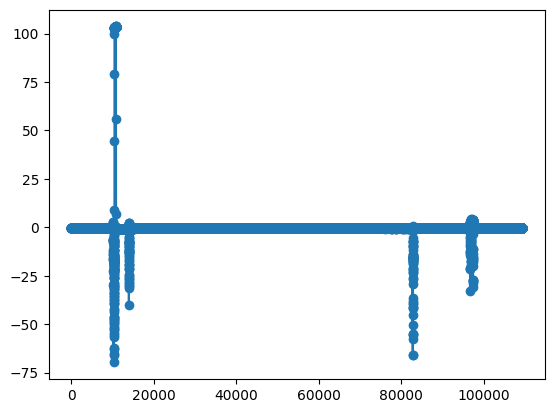

In [49]:
plt.plot(df_copy['Battery Current'], marker='o')

In [50]:
# Reset index and rename

df_copy.reset_index(drop=True, inplace=True)
df_copy.rename_axis('Time(s)', inplace=True)

# Now add 1 to the 'Time(s)' column
df_copy['Time(s)'] = df_copy.index.astype(int) + 1
# # Convert 'Time(s)' column to integers, handling errors
# try:
#     df_copy['Time(s)'] = df_copy['Time(s)'].astype(int) + 1
# except ValueError as e:
#     print(f"Error: {e}")

# print(df_copy)


# # Step 2: Define a function to adjust the sign based on 'bmsstate'
def adjust_sign(row):
#    if row['BMS_State'] == 'Discharging': # For general 
    if row['status'] == 'Discharging': #  For general
        # return row['Battery Current']   # For general
        return -row['Battery Current']  # For Device 63
    return row['Battery Current']  # For general
    # return row['Battery Current']  # For Device 63
# # Step 3: Apply the function to create the new column
# df_copy['adjusted_BatteryCurrent'] = df_copy.apply(adjust_sign, axis=1)
# print(df_copy[battery_current])


In [51]:
# Voltage and time axis values

min_grp_voltage_array = [min(df_copy['Battery Volt'])]
min_grp_voltage = int(min_grp_voltage_array[0])
max_grp_voltage_array = [max(df_copy['Battery Volt'])]
max_grp_voltage = int(max_grp_voltage_array[0]) + 1
# print("Maximum group voltage: " + str(max_grp_voltage))
# print("Maximum group voltage: " + str(min_grp_voltage))
div_voltage_yaxis = int(((max_grp_voltage))-int(min_grp_voltage))
grp_voltage_diff = (((int(max_grp_voltage)+1) - int(min_grp_voltage)) / ( 10 ))
# print(grp_voltage_diff)


min_time = 0
max_time = len(df_copy)
time_diff_forlog = int(max_time - min_time) 
# print(max_time)
# log_time = int( math.log10(time_diff))
# print(log_time)
time_diff = int(time_diff_forlog/5)
# print(time_diff)
# time_diff_flattened = 

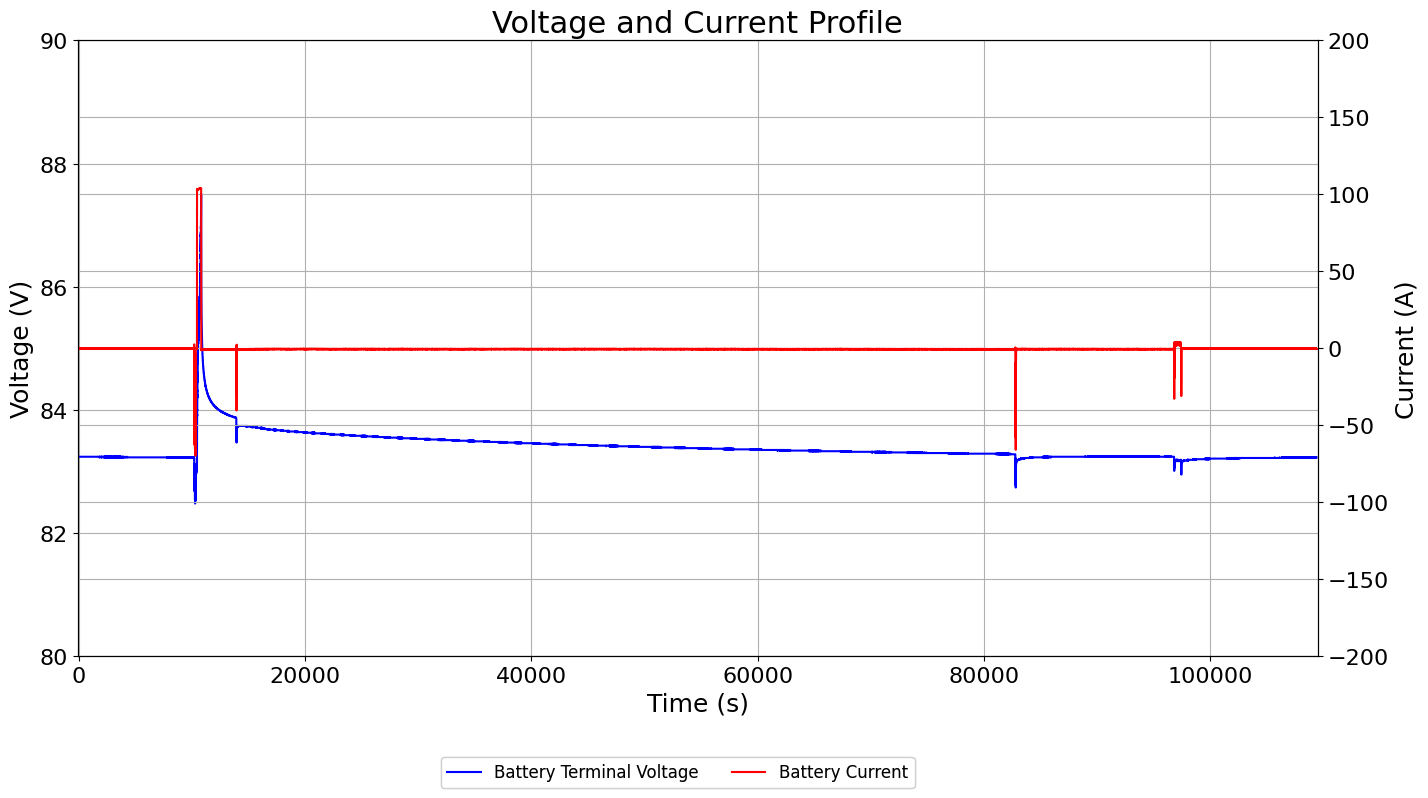

In [52]:
# Plot Battery Voltage and current

# Create a single plot with both battery voltage and current
fig,ax1 = plt.subplots(figsize=(16, 8))  # Adjust the figure size as needed

ax1.set_xlabel('Time (s)',fontsize = 18) 
ax1.set_ylabel('Voltage (V)',fontsize = 18) 

# Plot battery voltage on the primary y-axis

ax1.plot(df_copy['Time(s)'], df_copy['Battery Volt'], label='Battery terminal voltage ', color='blue') # For General 
# ax1.plot(df_copy['Time(s)'], df_copy['BatteryVoltage'], label='Battery terminal voltage (V)', color='blue') # For Device 63
ax1.grid(True)

ax1.set_xlim(min_time - 100, max_time + 100)
ax1.set_ylim(min_grp_voltage - 2, max_grp_voltage + 2)
ax1.tick_params(axis='y', labelsize=16)
# ax1.set_xticks(custom_xticks, fontsize = 2)
ax1.tick_params(axis='x', labelsize=16)
# Create a secondary y-axis for battery current
ax2 = ax1.twinx() 

ax2.set_xlim(min_time - 100, max_time + 100)
ax2.set_ylim(-200, 200)
# ax2.plot(df_copy['Time(s)'], df_copy['adjusted_BatteryCurrent'], label='Battery Current ', color='red')
ax2.plot(df_copy['Time(s)'], df_copy['Battery Current'], label='Battery Current ', color='red')

ax2.set_ylabel('Current (A)', fontsize = 18)

# Add legends, title, and labels
if(user_input == 1):
    plt.title('Voltage and Current Profile',fontsize = 22)
if(user_input == 2):
    plt.title('Voltage and Current Profile',fontsize = 22)

# plt.xlabel('Time(s)',fontsize=18)
plt.grid(True)
plt.ylabel('Current (A)', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

lines = [ax1.lines[0], ax2.lines[0]]
labels = ['Battery Terminal Voltage', 'Battery Current']
# Create a single legend outside the subplots
# combined_legend = fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(1, 0.9), fontsize = 18)
combined_legend = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.005), fontsize = 12, ncol = 2)

# Add the combined legend to the figure
fig.add_artist(combined_legend)

plt.savefig(report_path+'/BTV_vs_Current.jpg',bbox_inches='tight',dpi =600)
# Show the plot
# plt.show()

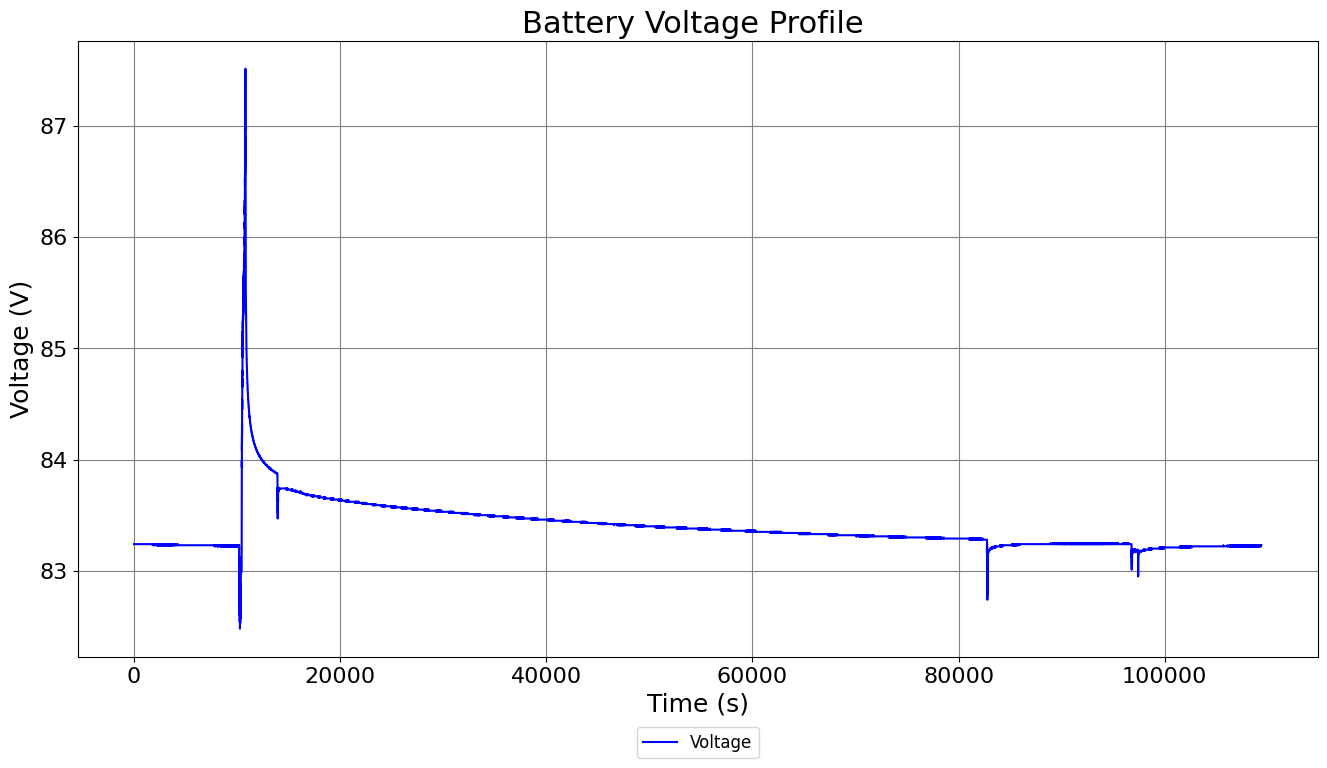

In [53]:
# Battery Voltage graph

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
plt.plot(df_copy['Time(s)'], df_copy['Battery Volt'],  color='blue', label = 'Voltage')
# Add labels, title, grid, and legend
plt.title('Battery Voltage Profile ',fontsize = 22)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(True, color = "grey")
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Voltage (V)', fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize = 12, ncol=1)
plt.savefig(report_path +'/'+'Battery_voltage_profile.jpg', bbox_inches='tight',dpi =600)

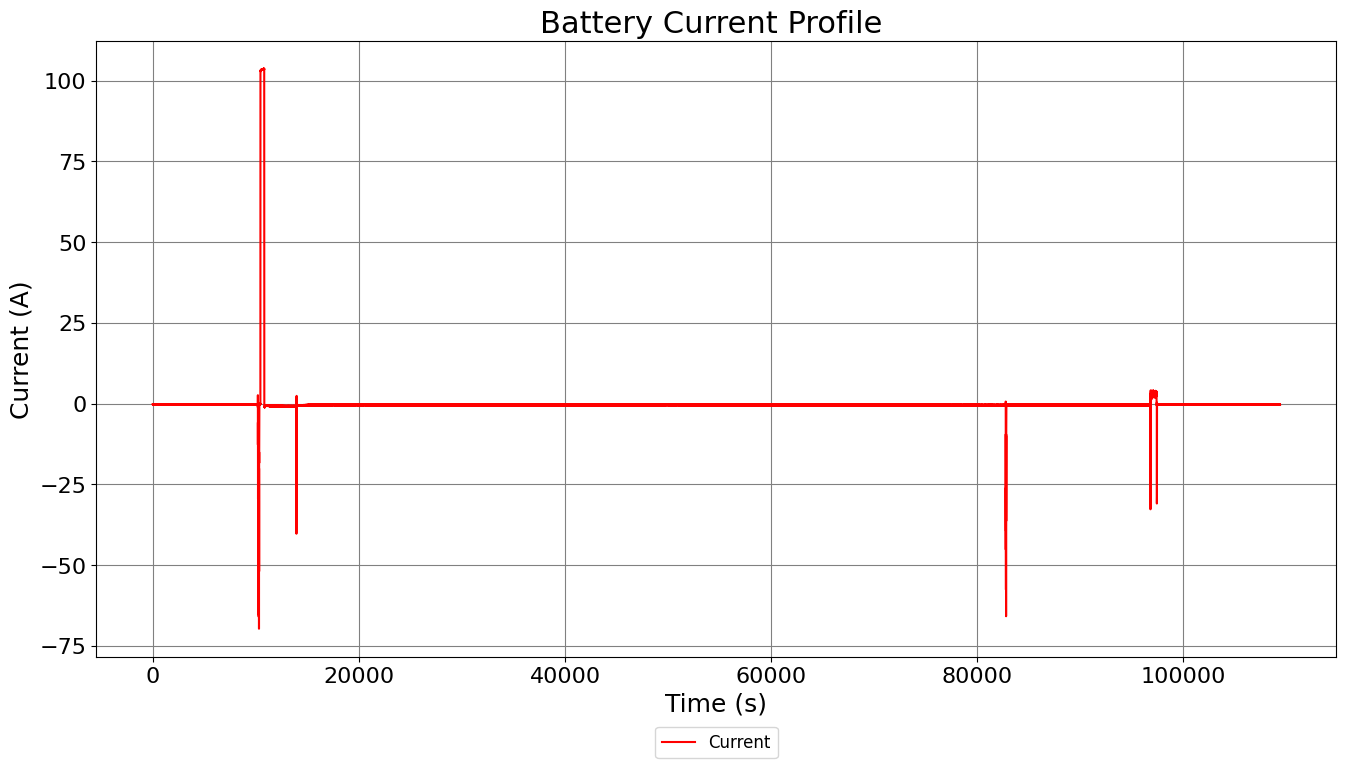

In [54]:
# Battery Current graph

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
plt.plot(df_copy['Time(s)'], df_copy['Battery Current'], color='red', label = 'Current')
# Add labels, title, grid, and legend
plt.title('Battery Current Profile ',fontsize = 22)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(True, color = "grey")
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Current (A)', fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize = 12, ncol=1)
plt.savefig(report_path +'/'+'Battery_current_profile.jpg', bbox_inches='tight',dpi =600)

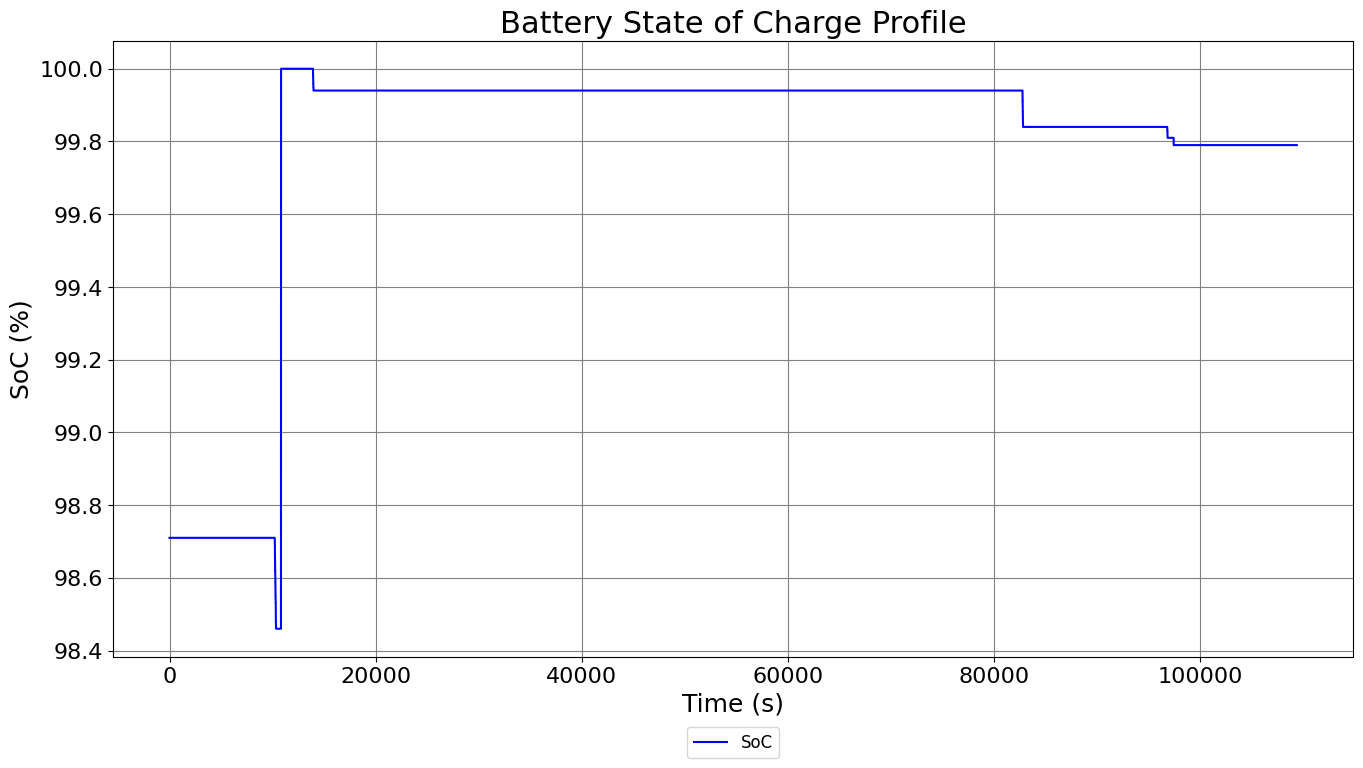

In [55]:
# Plot SoC

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Internal temperature column names (assuming they are named 'cell1_voltage', 'cell2_voltage', ..., 'cell10_voltage')
# plt.plot(df_copy['Time(s)'], df_copy['BAT_SOC'], label='SoC', color='blue') # For general
plt.plot(df_copy['Time(s)'], df_copy['SoC'], label='SoC', color='blue') # For Device 63
# Add labels, title, grid, and legend
plt.grid(True, color = "grey")
plt.title('Battery State of Charge Profile', fontsize = 22)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('SoC (%)', fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize = 12, ncol=1)
plt.savefig(report_path +'/Battery_SoC.jpg',bbox_inches='tight',dpi =600)

# Show the plot
# plt.show()

In [56]:
# Capacity calculation


# plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

factor = 3600
df_copy['capacity'] = (df_copy['Battery Current']/factor)
df_copy['cumulative_capacity'] = df_copy['capacity'].cumsum()
cumulative_capacity = df_copy['cumulative_capacity'].iloc[-1]
rounded_cumulative_capacity = round(cumulative_capacity,2)
# print(rounded_cumulative_capacity, ' ', cumulative_capacity)

last_time_value = (df_copy['Time(s)']/3600)
rounded_last_time_value = round(last_time_value,2)
# print(rounded_last_time_value, ' ', last_time_value)

# # Internal temperature column names (assuming they are named 'cell1_voltage', 'cell2_voltage', ..., 'cell10_voltage')
# plt.plot(df_copy['Time(s)'], df_copy['cumulative_capacity'], label='Capacity', color='blue')

# # Add labels, title, grid, and legend
# plt.xlabel('Time(s)')
# plt.ylabel('Capacity (Ah)')
# plt.title('Capacity graph')
# plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-." )
# plt.legend()
# plt.savefig(report_path+'/Capacity.jpg',bbox_inches='tight',dpi =600)

# # Show the plot
# plt.show()

In [57]:
# SoH value
if 'SoH' in df_copy.columns and not df_copy['SoH'].empty and df_copy['SoH'].iloc[-1]:
    soh = df_copy['SoH'].iloc[-1]
else:
    soh = 99 

print("SoH value: " + str(soh))

SoH value: 99


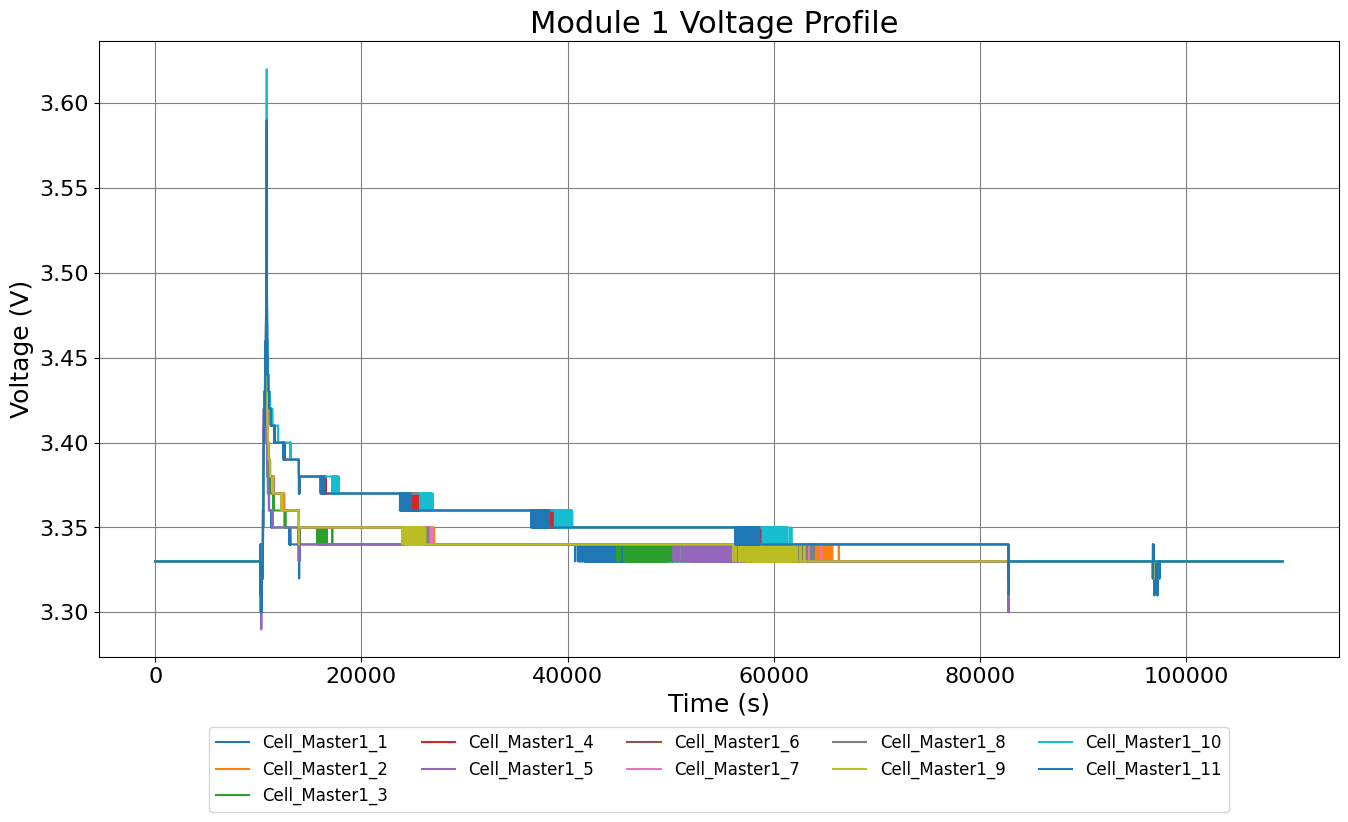

In [58]:
# Plot Module 1 cell voltages 

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Extract cell voltage column names (assuming they are named 'cell1_voltage', 'cell2_voltage', ..., 'cell10_voltage')
# cell_voltage_columns = [f'Cell{i}' for i in range(1, 9)] # For general
cell_voltage_columns_1 = [f'Cell_Master1_{i}' for i in range(1, cells_of_module1+1)] # For Device 3
#column name
# cell_voltage_columns_1 = [f'Cell_Module1_{i}' for i in range(1, cells_of_module1+1)] # For Device 3

# Plot each cell voltage column
for cell_voltage_column in cell_voltage_columns_1:
    plt.plot(df_copy['Time(s)'], df_copy[cell_voltage_column], label=cell_voltage_column)

# Add labels, title, grid, and legend
plt.title('Module 1 Voltage Profile ',fontsize = 22)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(True, color = "grey")
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Voltage (V)', fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize = 12, ncol=5)
plt.savefig(report_path +'/'+'Module1_voltage_profile.jpg', bbox_inches='tight',dpi =600)

# Show the plot
# plt.show()

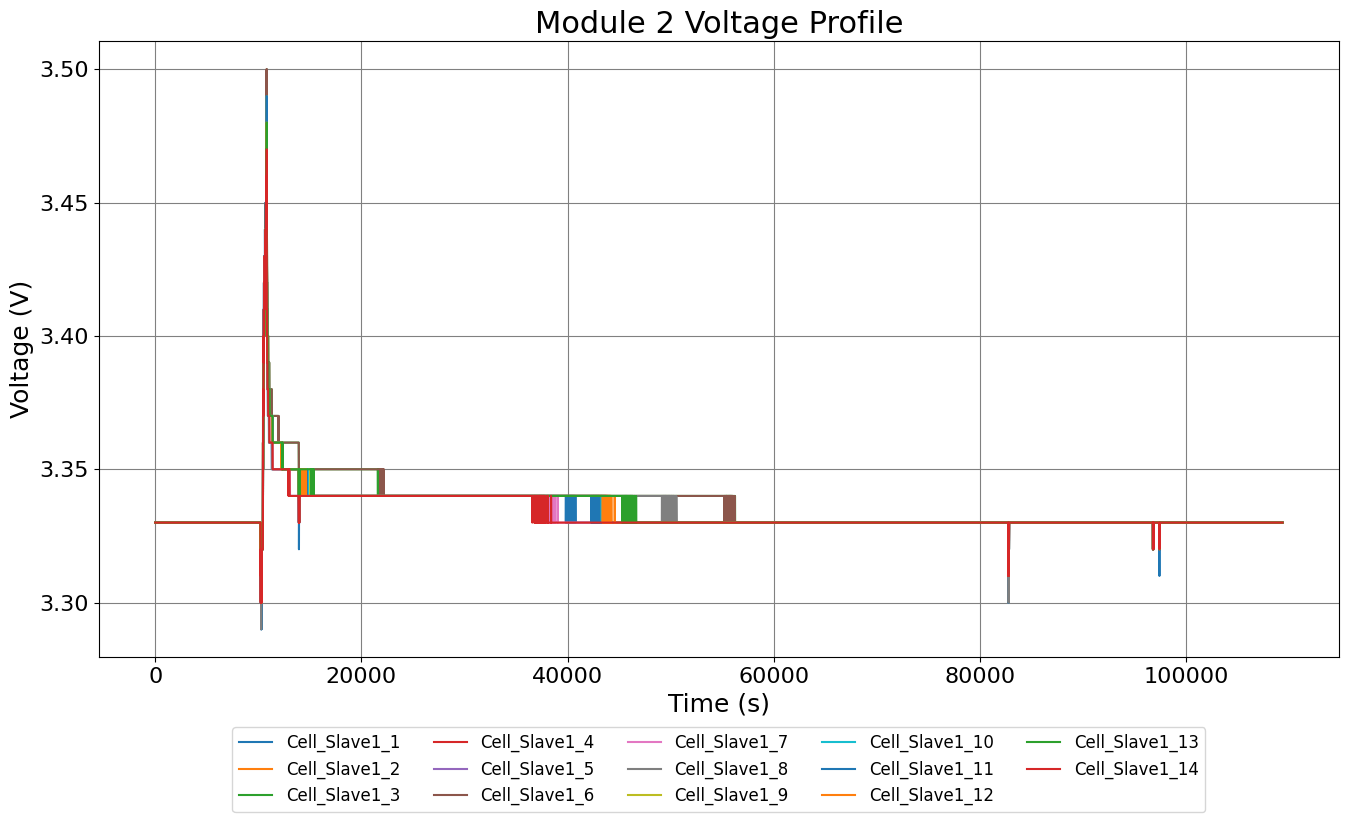

In [59]:
# Plot Module 2 cell voltages 

if total_number_of_modules >= 2:
    plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

    # Extract cell voltage column names (assuming they are named 'cell1_voltage', 'cell2_voltage', ..., 'cell10_voltage')
    # cell_voltage_columns = [f'Cell{i}' for i in range(9, 17)] # For General
    cell_voltage_columns_2 = [f'Cell_Slave1_{i}' for i in range( 1, cells_of_module2 + 1)] # For Device 63

    # Plot each cell voltage column
    for cell_voltage_column in cell_voltage_columns_2:
        plt.plot(df_copy['Time(s)'], df_copy[cell_voltage_column], label=cell_voltage_column)

    # Add labels, title, grid, and legend
    plt.title('Module 2 Voltage Profile',fontsize = 22)
    plt.yticks(fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.grid(True, color = "grey")
    plt.xlabel('Time (s)', fontsize = 18)
    plt.ylabel('Voltage (V)', fontsize = 18)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize = 12, ncol=5)
    plt.savefig(report_path +'/'+'Module2_voltage_profile.jpg', bbox_inches='tight',dpi =600)

# Show the plot
# plt.show()

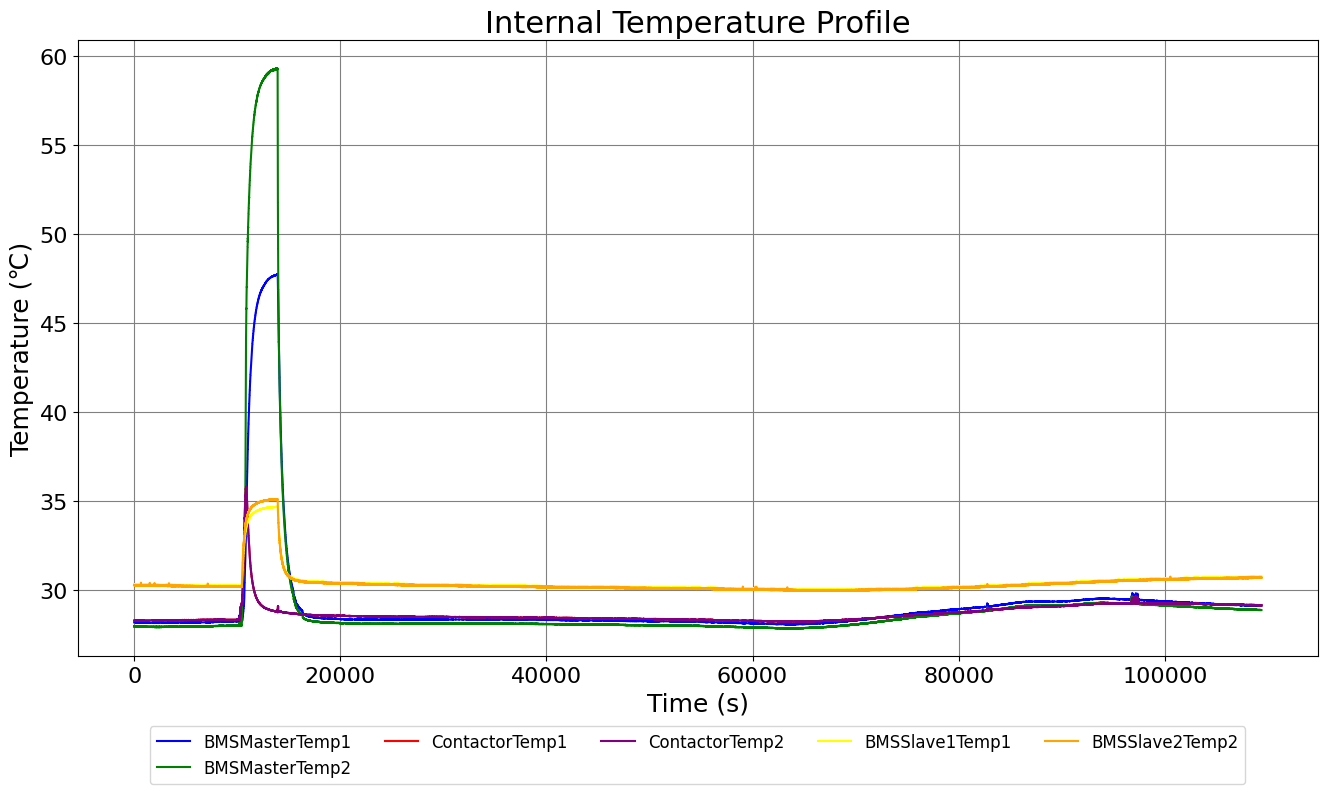

In [60]:
# Plot all internal temperatures 

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed height and width

# Internal temperature column names (assuming they are named 'cell1_voltage', 'cell2_voltage', ..., 'cell10_voltage')
if board_version == 1 and switch_version == 1: #( Board version v1.03, Switch version PIU)
    # plt.plot(df_copy['Time(s)'], df_copy['BMS_Master1_1'], label='BMSMasterTemp1', color='blue') 
    # plt.plot(df_copy['Time(s)'], df_copy['PIU_Master1_1'], label='PIUTemp1', color='red')
    # plt.plot(df_copy['Time(s)'], df_copy['PIU_Master1_2'], label='PIUTemp2', color='purple')
    plt.plot(df_copy['Time(s)'], df_copy['BMS_Module1_1'], label='BMSMasterTemp1', color='blue') 
    plt.plot(df_copy['Time(s)'], df_copy['PIU_Module1_1'], label='PIUTemp1', color='red')
    plt.plot(df_copy['Time(s)'], df_copy['PIU_Module1_2'], label='PIUTemp2', color='purple')
if board_version == 2 and switch_version == 1: #( Board version v3.02, Switch version PIU)
    plt.plot(df_copy['Time(s)'], df_copy['BMS_Master1_1'], label='BMSMasterTemp1', color='blue') 
    plt.plot(df_copy['Time(s)'], df_copy['BMS_Master1_2'], label='BMSMasterTemp2', color='green')
    plt.plot(df_copy['Time(s)'], df_copy['PIU_Master1_1'], label='PIUTemp1', color='red')
    plt.plot(df_copy['Time(s)'], df_copy['PIU_Master1_2'], label='PIUTemp2', color='purple')
if board_version == 2 and switch_version == 2: #( Board version v3.02, Switch version Contactor)
    plt.plot(df_copy['Time(s)'], df_copy['BMS_Master1_1'], label='BMSMasterTemp1', color='blue') 
    plt.plot(df_copy['Time(s)'], df_copy['BMS_Master1_2'], label='BMSMasterTemp2', color='green')
    plt.plot(df_copy['Time(s)'], df_copy['PIU_Master1_1'], label='ContactorTemp1', color='red')
    plt.plot(df_copy['Time(s)'], df_copy['PIU_Master1_2'], label='ContactorTemp2', color='purple')
    if total_number_of_modules >= 2:
        plt.plot(df_copy['Time(s)'], df_copy['BMS_Slave1_1'], label='BMSSlave1Temp1', color='yellow')
        plt.plot(df_copy['Time(s)'], df_copy['BMS_Slave1_2'], label='BMSSlave2Temp2', color='orange')
    if total_number_of_modules >= 3:
        plt.plot(df_copy['Time(s)'], df_copy['BMS_Slave2_1'], label='BMSSlave2Temp1')
        plt.plot(df_copy['Time(s)'], df_copy['BMS_Slave2_2'], label='BMSSlave2Temp2')
    if total_number_of_modules >= 4:
        plt.plot(df_copy['Time(s)'], df_copy['BMS_Slave3_1'], label='BMSSlave3Temp1')
        plt.plot(df_copy['Time(s)'], df_copy['BMS_Slave3_2'], label='BMSSlave3Temp2')
    if total_number_of_modules >= 5:
        plt.plot(df_copy['Time(s)'], df_copy['BMS_Slave4_1'], label='BMSSlave4Temp1')
        plt.plot(df_copy['Time(s)'], df_copy['BMS_Slave4_2'], label='BMSSlave4Temp2')

# Add labels, title, grid, and legend
plt.title('Internal Temperature Profile', fontsize = 22)
plt.grid(True, color = "grey")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Temperature (℃)', fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize = 12, ncol=5)
plt.savefig(report_path +'/Internal_temperature_profile.jpg',  bbox_inches='tight',dpi =600)
# Show the plot
# plt.show()

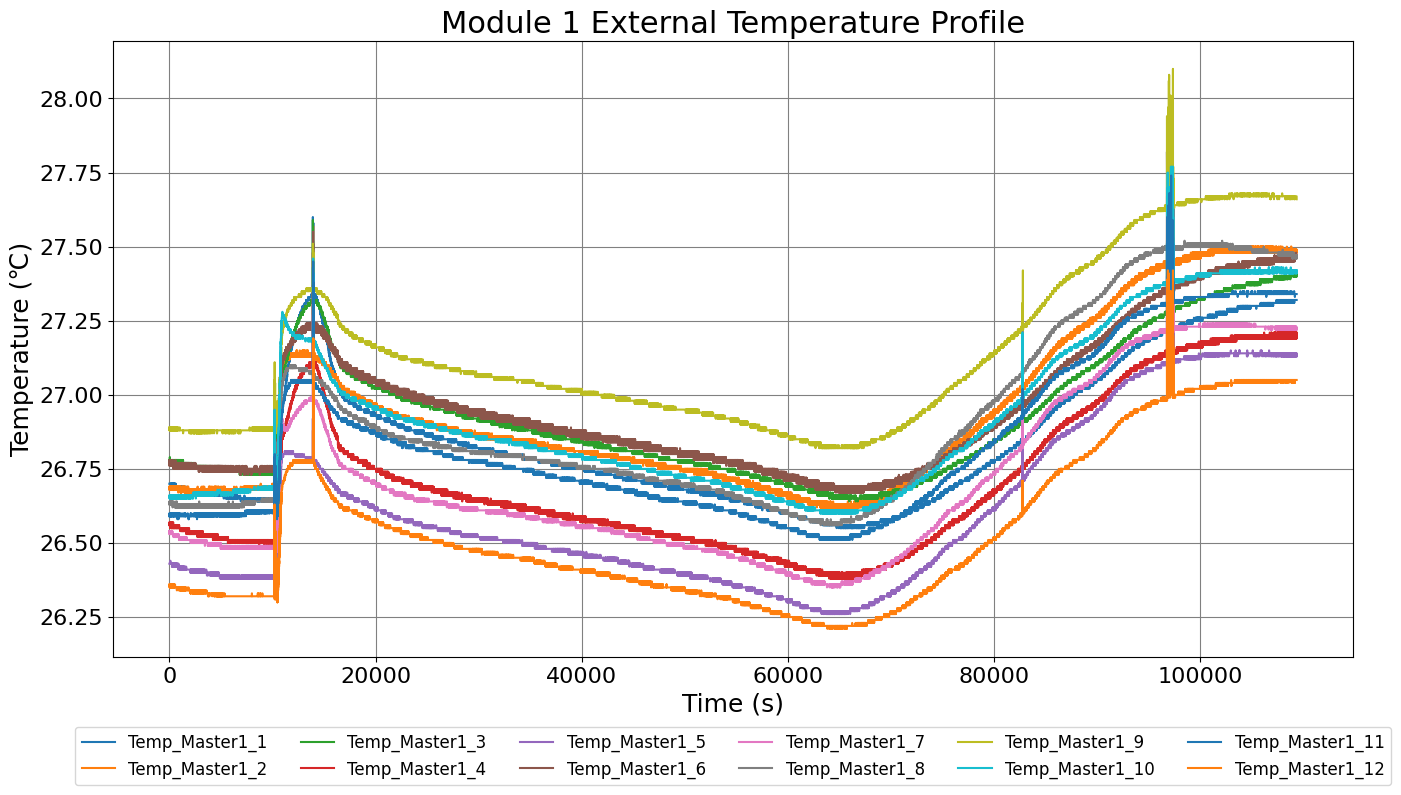

In [61]:
# Plot Module 1 external temperature 

if total_number_of_modules >= 1:
    plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

    # Extract temperature column names (assuming they are named 'cell1_voltage', 'cell2_voltage', ..., 'cell10_voltage')
    if board_version == 1:
        # external_temp_columns = [f'Temp_Master1_{i}' for i in range(1, 14)] # For v1.03
    # board number
        external_temp_columns = [f'Temp_Module1_{i}' for i in range(1, 14)] # For v1.03
    if board_version == 2:
        external_temp_columns = [f'Temp_Master1_{i}' for i in range(1, 13)] # For v3.12
    # Plot temperature column
    for external_temp_column in external_temp_columns:
        plt.plot(df_copy['Time(s)'], df_copy[external_temp_column], label=external_temp_column)

    # Add labels, title, grid, and legend
    plt.title('Module 1 External Temperature Profile', fontsize = 22)
    plt.grid(True, color = "grey")
    plt.yticks(fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.xlabel('Time (s)', fontsize = 18)
    plt.ylabel('Temperature (℃)', fontsize = 18)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize = 12, ncol=6)
    plt.savefig(report_path +'/External_Temperature_Profile_1.jpg', bbox_inches='tight', dpi =600)

    # Show the plot
    # plt.show()

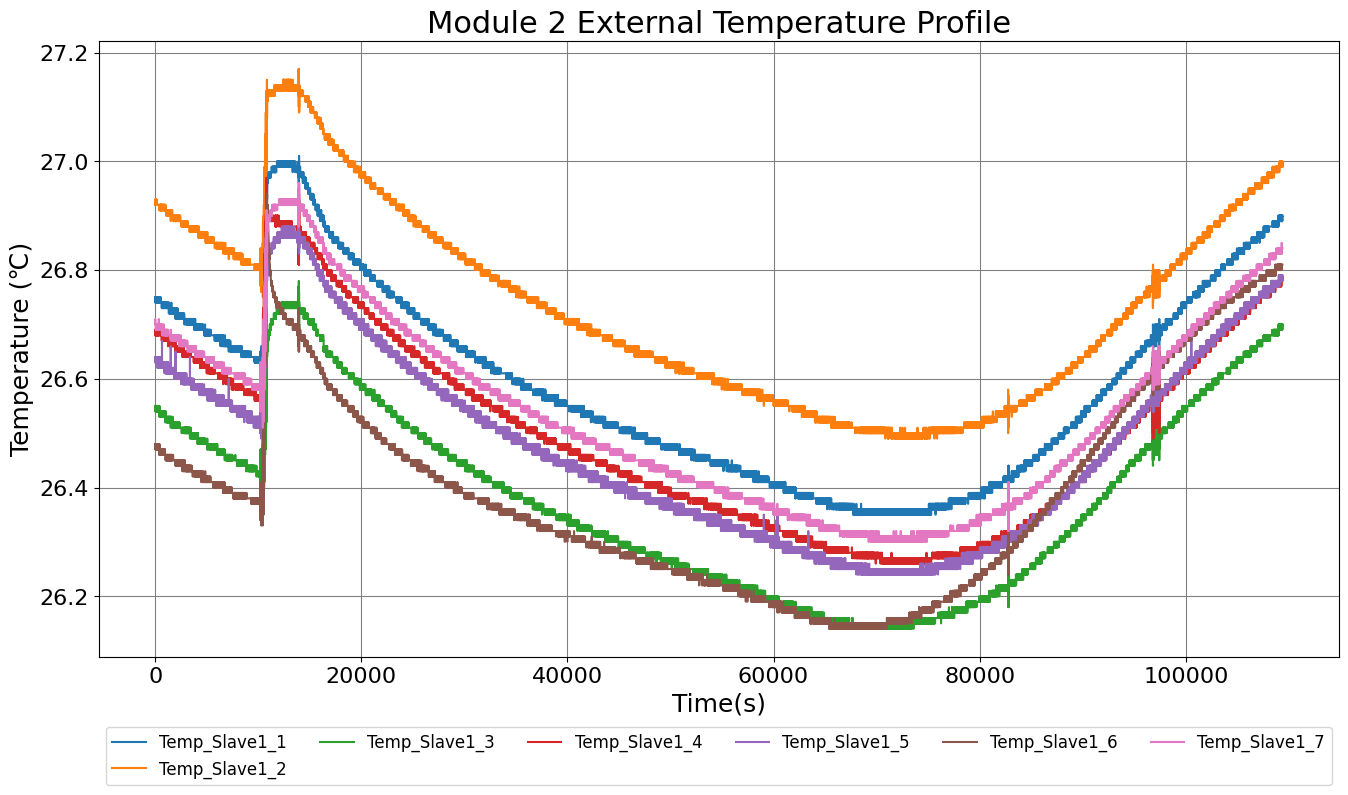

In [62]:
# Plot Module 2 external temperature 

if total_number_of_modules >= 2:
    plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

    # Extract temperature column names (assuming they are named 'cell1_voltage', 'cell2_voltage', ..., 'cell10_voltage')
    if board_version == 1:
        external_temp_columns = [f'Temp_Slave1_{i}' for i in range(1, 8)] # For v1.03
    if board_version == 2:
        external_temp_columns = [f'Temp_Slave1_{i}' for i in range(1, 8)] # For v3.12
    # Plot temperature column
    for external_temp_column in external_temp_columns:
        plt.plot(df_copy['Time(s)'], df_copy[external_temp_column], label=external_temp_column)

    # Add labels, title, grid, and legend
    plt.title('Module 2 External Temperature Profile', fontsize = 22)
    plt.grid(True, color = "grey")
    plt.yticks(fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.xlabel('Time(s)', fontsize = 18)
    plt.ylabel('Temperature (℃)', fontsize = 18)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize = 12, ncol=6)
    plt.savefig(report_path +'/External_Temperature_Profile_2.jpg', bbox_inches='tight', dpi =600)

    # Show the plot
    # plt.show()

In [63]:
# BMS State changes  #need to be changed for 5.1 after getting flag details and appropriate information

# successfull
# optimize code

# bms_state_value = df_copy['BMS_Flag'] # changed it from BMS_Flag to bmsFlag # For general
bms_state_value = df_copy['bmsFlag'] # changed it from BMS_Flag to bmsFlag # For Device 63

# bms_state_value
SLFT = []
CVRF= []
TRF = []
OCUF = []
HICV = []
LOCV = []
HTMP = []
LTMP = []
OPCW = []
OPTWMASTER = []
OPTWSLAVE = []
OPTWPIU= []
CSE= []
AFE= []
CANE=[] 
SDE = []
PCF =[]
PCSC= []
HIBV = []
LOBV = []
OCUFPEAK= []
SCPFAULT= []
ADCOV= []
EWDRST = []
BMSSTATE0= []
BMSSTATE1= []
CB  = []
MOD0 = []
MOD1 = []

IDLEE =[]
STANDBY =[]
SLEEP=[]
DEEPSLEEP= []

IDLE = []
CHG = []
DCHG = []
CO  = []
# positions = []    
positions = [MOD1,MOD0,[],CB,[],[],BMSSTATE1,BMSSTATE0,EWDRST,ADCOV,SCPFAULT,OCUFPEAK,LOBV,HIBV,PCSC,PCF,SDE,CANE,AFE,CSE,OPTWPIU,OPTWSLAVE,OPTWMASTER,OPCW,LTMP,HTMP,LOCV,HICV,OCUF,TRF,CVRF,SLFT]

def eight_value_hex_to_bin(bms_state_val):    
    # print(bms_state_val)
    hex_val1 = hex(int(str(bms_state_val)[2],16))
    hex_val2 = hex(int(str(bms_state_val)[3],16))
    hex_val3 = hex(int(str(bms_state_val)[4],16))
    hex_val4 = hex(int(str(bms_state_val)[5],16))  
    hex_val5 = hex(int(str(bms_state_val)[6],16)) 
    hex_val6 = hex(int(str(bms_state_val)[7],16)) 
    hex_val7 = hex(int(str(bms_state_val)[8],16)) 
    hex_val8 = hex(int(str(bms_state_val)[9],16)) 
    # hex_val9 = hex(int(str(bms_state_val)[5],16))       
    # hex_val4 = hex(int(str(bms_state_val)[5],16))        
    #hex_val = hex(int(hex_val1,16)) + hex(int(hex_val2,16)).lstrip('0x') + hex(int(hex_val3,16)).lstrip('0x') + hex(int(hex_val4,16)).lstrip('0x')
    #binary = (bin(hex_val1<<32).replace("0b",""))|(bin(hex_val2<<16).replace("0b",""))|(bin(hex_val3<<8).replace("0b",""))|(bin(hex_val4).replace("0b",""))
    hex_val = str(hex_val1)+ str(hex_val2).replace('0x','')+ str(hex_val3).replace('0x','')+str(hex_val4).replace('0x','')+str(hex_val5).replace('0x','')+str(hex_val6).replace('0x','')+str(hex_val7).replace('0x','')+str(hex_val8).replace('0x','')
    #print(hex_val)
    int_val = int(hex_val,16)
    #print(int_val)
    binary = str(format(int_val,'032b'))
    return list(binary)

bms_state_list = bms_state_value.tolist()

# Correct the bms state value if of abnormal size
for k in range(len(bms_state_list)):
    if(len(str(bms_state_list[k])) == 3):
        bms_state_list[k] = str(bms_state_list[k]).replace('0x','0x0000000')
    if(len(str(bms_state_list[k])) == 4):
        bms_state_list[k] = str(bms_state_list[k]).replace('0x','0x000000')
    if(len(str(bms_state_list[k])) == 5):    
        bms_state_list[k] = str(bms_state_list[k]).replace('0x','0x00000')
    if(len(str(bms_state_list[k])) == 6):    
        bms_state_list[k] = str(bms_state_list[k]).replace('0x','0x0000')
    if(len(str(bms_state_list[k])) == 7):    
        bms_state_list[k] = str(bms_state_list[k]).replace('0x','0x000')
    if(len(str(bms_state_list[k])) == 8):    
        bms_state_list[k] = str(bms_state_list[k]).replace('0x','0x00')
    if(len(str(bms_state_list[k])) == 9):    
        bms_state_list[k] = str(bms_state_list[k]).replace('0x','0x0')
    

#print(bms_state_list)
for j in range(len(bms_state_list)):
    temp_list = []
    bin_bms_state = eight_value_hex_to_bin(str(bms_state_list[j]))
    for i in range(len(bin_bms_state)):
        if(bin_bms_state[i] == '1'):
            temp_list.append(i)
    for i in range(len(temp_list)):
        positions[temp_list[i]].append(j)
        # print(positions[temp_list[i]])

# change for MOD0,MOD1
for j in range(len(bms_state_list)):
    if(j not in positions[0] and j not in positions[1]): #00
        IDLE.append(j)
    if(j not in positions[0] and j in positions[1]): #01
        CHG.append(j)
    # elif(positions[0] == j and positions[1] == j):
    if(j  in positions[0] and j not in positions[1]):#10
        DCHG.append(j)
    if(j  in positions[0] and j in positions[1]): #11
        CO.append(j)


# Clear and isolated logic for BMSSTATE0 and BMSSTATE1
for j in range(len(bms_state_list)):
    if j in BMSSTATE0 and j in BMSSTATE1: #11
        DEEPSLEEP.append(j)
    elif j in BMSSTATE0 and j not in BMSSTATE1:  #10
        SLEEP.append(j)
    elif j not in BMSSTATE0 and j in BMSSTATE1:   #01
        STANDBY.append(j)
    elif j not in BMSSTATE0 and j not in BMSSTATE1:   #00
        IDLEE.append(j)






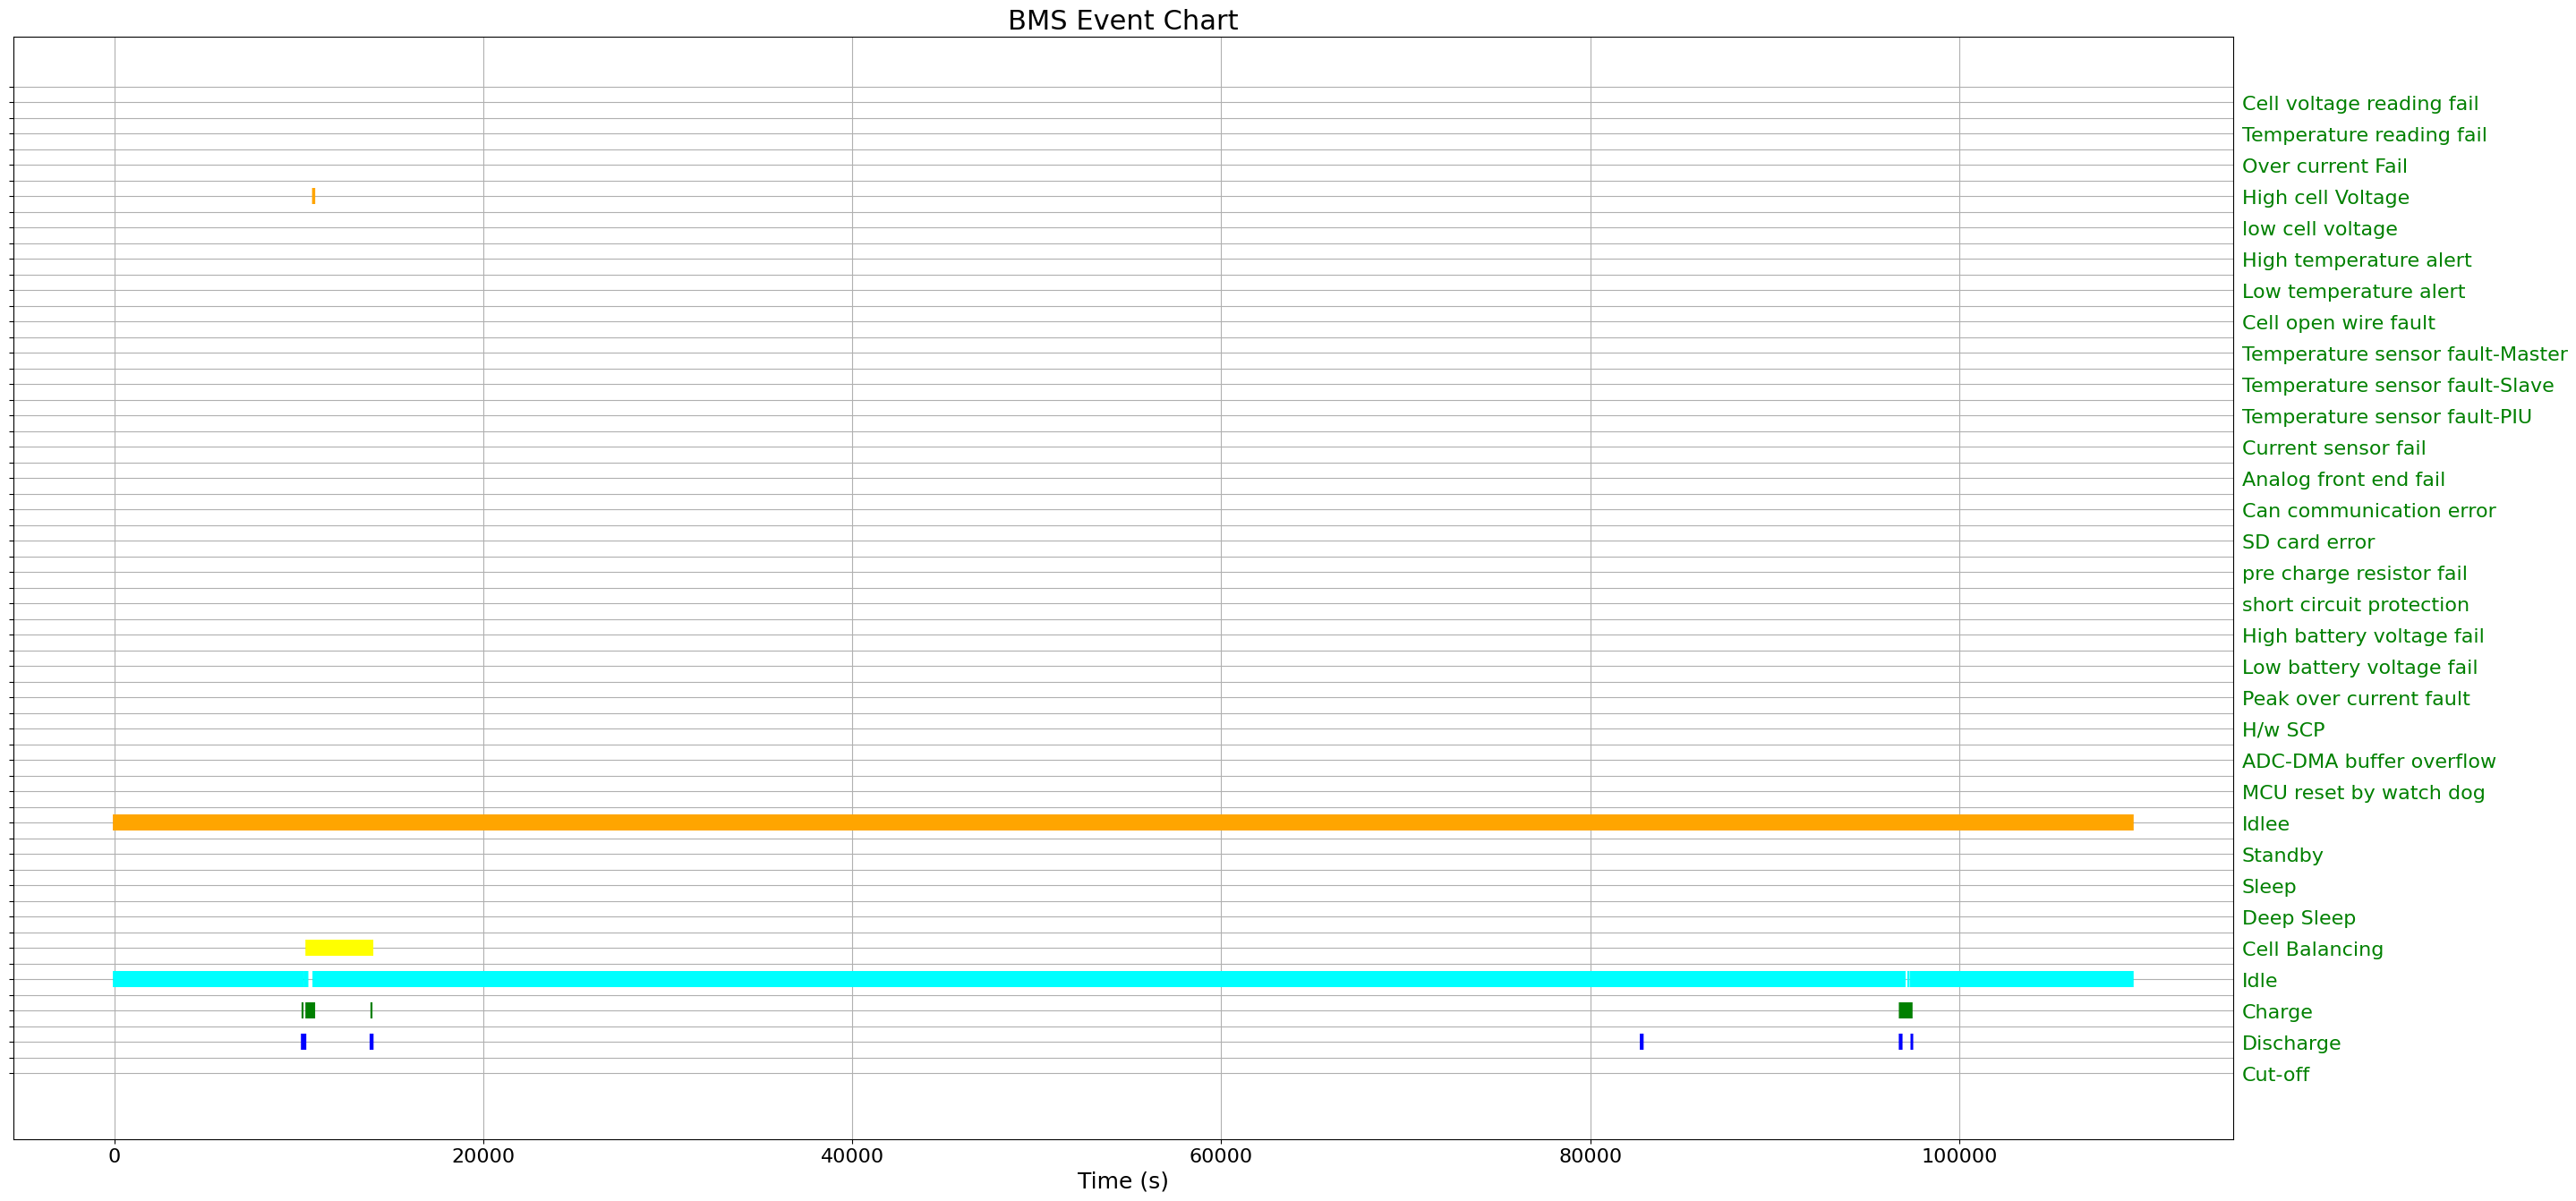

In [64]:
# Modified graph for charge, discharge and idle #changes need to be done 
 
new_positions_graph = []
# new_positions_graph = [CO,DCHG,CHG,IDLE,CB,LOBV,HIBV,OPTW,OPCW,LTMP,HTMP,LOCV,HICV,OCUF,TRF,CVRF] 
new_positions_graph= [CO,DCHG,CHG,IDLE,CB,DEEPSLEEP,SLEEP,STANDBY,IDLEE,EWDRST,ADCOV,SCPFAULT,OCUFPEAK,LOBV,HIBV,PCSC,PCF,SDE,CANE,AFE,CSE,OPTWPIU,OPTWSLAVE,OPTWMASTER,OPCW,LTMP,HTMP,LOCV,HICV,OCUF,TRF,CVRF]

# fig, ax = plt.subplots(figsize = (16,8))
fig, ax = plt.subplots(figsize = (32,16))
# Use automatic StrMethodFormatter
ax.set_yticks(range(64))

# bms_states = ['Cut-off',' ',
#             'Discharge',' ',
#             'Charge',' ',
#             'Idle',' ',
#             'Cell Balancing',' ',
#             'Low Battery Voltage',' ',
#             'High Battery Voltage',' ',
#             'Temperature sensor fault',' ',
#             'Cell open wire fault',' ',
#             'Low temperature alert',' ',
#             'High temperature alert',' ',
#             'Low cell voltage',' ',
#             'High cell voltage',' ',
#             'Over current fault',' ',
#             'Temperature reading fail',' ',
#             'Cell voltage reading fail',' ',
# ]
bms_states=['Cut-off',' ',
            'Discharge',' ',
            'Charge',' ',
            'Idle',' ',
            'Cell Balancing',' ',
            'Deep Sleep',' ',
            'Sleep',' ',
            'Standby',' ',
            'Idlee',' ',
            'MCU reset by watch dog',' ',
            'ADC-DMA buffer overflow', ' ',
            'H/w SCP',' ',
            'Peak over current fault',' ',
            'Low battery voltage fail',' ',
            'High battery voltage fail',' ',
            'short circuit protection',' ',
            'pre charge resistor fail',' ',
            'SD card error',' ',
            'Can communication error',' ',
            'Analog front end fail',' ',
            'Current sensor fail',' ',
            'Temperature sensor fault-PIU',' ',
            'Temperature sensor fault-Slave',' ',
            'Temperature sensor fault-Master',' ',
            'Cell open wire fault',' ',
            'Low temperature alert',' ',
            'High temperature alert',' ',
            'low cell voltage',' ',
            'High cell Voltage',' ',
            'Over current Fail',' ',
            'Temperature reading fail',' ',
            'Cell voltage reading fail',' ',
            # 'Self test fail', ' '
        ]
ax.set_yticklabels(bms_states)
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                        labelleft=False, labelright=True,labelsize='xx-large')
ax.set_xlabel('Time (s)',fontsize=18) 
offsets = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62]
ax.grid()
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
#ax.yaxis.set_major_formatter(bms_States)
plt.title('BMS Event Chart',fontsize = 22)
# ax.eventplot(positions, lineoffsets=offsets, colors=['green','cyan','blue','red','yellow','blue','red','green','magenta','green','cyan','green','red','green','cyan','blue'])
ax.eventplot(new_positions_graph, lineoffsets=offsets, colors=['red','blue','green','cyan','yellow','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange'])
plt.savefig(report_path+r'\BMS_state_chart.jpg',bbox_inches='tight',dpi =600)

# plt


In [65]:
# Create fault table

faults_table = []
for i in range(len(new_positions_graph)):
    if(len(new_positions_graph[i])!=0):
        # print(i)
        if(bms_states[i*2] != "Idle" and bms_states[i*2] != "Charge" and bms_states[i*2] != "Discharge" and bms_states[i*2] != "Cut-off" and bms_states[i*2] != "Cell Balancing" and bms_states[i*2]!="Idlee" and bms_states[i*2]!="Standby" and bms_states[i*2]!="Sleep" and bms_states[i*2]!= "Deep Sleep"):
            faults_table.append(bms_states[i*2])
            # print(bms_states[i*2])
# print(faults_table)
# print(" \n")
print('Length of faults table: ' + str(len(faults_table)))

Length of faults table: 1


In [66]:
# Event occurrence of faults

count_fault_occurrence = [0]*32 # make a list
flag = 1
last_fault_value = -2
# for fault_list in range(len(new_positions_graph)):
fault_list=0
# print(len(new_positions_graph[fault_list]))
if len(new_positions_graph[fault_list]) != 0:
    # print(f"Fault list: {fault_list}")
    for fault_list in range(32):
        for i in range(len(new_positions_graph[fault_list])):
            fault_value = new_positions_graph[fault_list][i]
            # print(fault_value)

            # if flag == 1:
            #     last_fault_value = fault_value
            #     flag = 0
            #     continue

            if last_fault_value + 1 != fault_value:
                count_fault_occurrence[fault_list] += 1
                # print(fault_value)
            
            last_fault_value = fault_value

        flag = 1
    # print(f"Unique fault occurrence count: {count_fault_occurrence}")
# print(fault_list)

Obtain Maximum and Minimum Module Voltages

In [67]:
# Maximum and minimum cell voltage value module 1

if total_number_of_modules >= 1:
    # cell_voltage_columns_1 = [f'Cell_Master1_{i}' for i in range(1, total_number_of_modules+1)] # For Device 63
    cell_voltage_columns_1 = [f'Cell_Master1_{i}' for i in range(1, cells_of_module1+1)] 
    # cell_voltage_columns_1 = [f'Cell_Module1_{i}' for i in range(1, cells_of_module1+1)] 

    # print(df_copy[cell_voltage_columns_1])
    # max_val_array = [None] * total_number_of_modules
    # min_val_array = [None] * total_number_of_modules
    max_val_array = [None] * cells_of_module1
    min_val_array = [None] * cells_of_module1
    i = 0
    min_values = df_copy[cell_voltage_columns_1].min()
    max_values = df_copy[cell_voltage_columns_1].max()
    # print(max_values)
    # Write the minimum and maximum values for cell columns in cells B15:C22
    cell_row = 15
    for max_val in max_values:
        # print(i)
        # print(max_val_array[0])
        max_val_array[i] = max_val
        # print(max_val)
        i = i + 1
    i = 0
    for min_val in min_values:
        min_val_array[i] = min_val
        i = i + 1
        # print(min_val)
    # print(max_val_array)
    
    #test
    # max_val_array = [1,2,3,4,5.9,5.9,3.7]
    
    voltage_max_value_1 = max(max_val_array)
    voltage_max_value_pos_1 = max_val_array.index(voltage_max_value_1)+1
    voltage_min_value_1 = min(min_val_array)
    voltage_min_value_pos_1 = min_val_array.index(voltage_min_value_1)+1
    
    # print(max_val_array)
    # print(len(max_val_array))
    # print(voltage_max_value_1)
    # print(voltage_max_value_pos_1)
    # print(voltage_min_value_1)
    # print(voltage_min_value_pos_1)

    


In [68]:
# Maximum and minimum cell voltage value module 2

if total_number_of_modules >= 2:
    # cell_voltage_columns_1 = [f'Cell_Master1_{i}' for i in range(1, total_number_of_modules+1)] # For Device 63
    cell_voltage_columns_2 = [f'Cell_Slave1_{i}' for i in range( 1, cells_of_module2 + 1)] # For Device 63

    # print(df_copy[cell_voltage_columns_1])
    # max_val_array = [None] * total_number_of_modules
    # min_val_array = [None] * total_number_of_modules
    max_val_array_2 = [None] * cells_of_module2
    min_val_array_2 = [None] * cells_of_module2
    i = 0
    min_values_2 = df_copy[cell_voltage_columns_2].min()
    max_values_2 = df_copy[cell_voltage_columns_2].max()
    # print(max_values_2)
    # Write the minimum and maximum values for cell columns in cells B15:C22
    cell_row = 15
    for max_val_2 in max_values_2:
        # print(i)
        # print(max_val_array[0])
        max_val_array_2[i] = max_val_2
        # print(max_val)
        i = i + 1
    i = 0
    for min_val_2 in min_values_2:
        min_val_array_2[i] = min_val_2
        i = i + 1
        # print(min_val)
    # print(max_val_array)
    voltage_max_value_2 = max(max_val_array_2)
    voltage_max_value_pos_2 = max_val_array_2.index(voltage_max_value_2)+1
    voltage_min_value_2 = min(min_val_array_2)
    voltage_min_value_pos_2 = min_val_array_2.index(voltage_min_value_2)+1
    # print(voltage_max_value)
    # print(voltage_max_value_pos)
    # print(voltage_min_value)
    # print(voltage_min_value_pos)
    # print(len(max_val_array_2))

Plot Maximum and Minimum Voltages

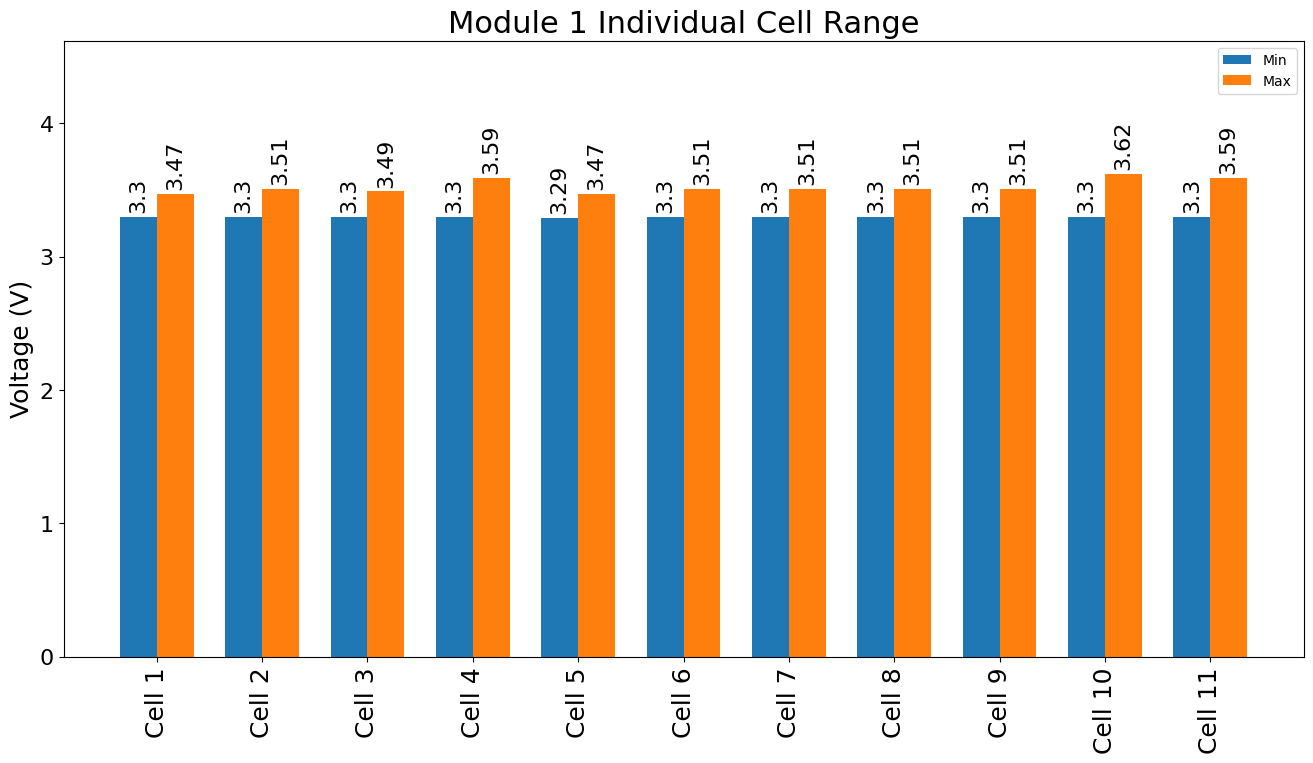

In [69]:
# Plot minimum and maximum cell voltage : Module 1

if total_number_of_modules >= 1:
    # min_values_1 = df_copy[cell_voltage_columns_1].min()
    # max_values_1 = df_copy[cell_voltage_columns_1].max()
    # print(cell_voltage_columns_1)
    # print(min_values)
    # plt.bar(cell_voltage_columns_1, min_values, color='skyblue')
    fig,ax = plt.subplots(figsize= (16,8))

    # Replace 'cells' with your cell labels
    # cells = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4', 'Cell 5', 'Cell 6', 'Cell 7', 'Cell 8', 'Cell 9', 'Cell 10','Cell 11', 'Cell 12', 'Cell 13', 'Cell 14', 'Cell 15', 'Cell 16', 'Cell 17', 'Cell 18' ]
    # cells = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4', 'Cell 5', 'Cell 6', 'Cell 7', 'Cell 8', 'Cell 9', 'Cell 10','Cell 11']
    # cells = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4', 'Cell 5', 'Cell 6', 'Cell 7', 'Cell 8', 'Cell 9', 'Cell 10', 'Cell 11', 'Cell 12', 'Cell 13', 'Cell 14', 'Cell 15' ]
    cells = [0]*cells_of_module1
    for i in range(1,cells_of_module1+1):
        cells[i-1] = 'Cell ' + str(i)

    # Replace these lists with your min and max values
    min_voltages = min_values
    max_voltages = max_values

    x = np.arange(len(cells))  # the label locations
    width = 0.35  # the width of the bars

    ax = plt.gca()

    # Plotting the bars for min and max voltages
    rects1 = ax.bar(x - width/2, min_voltages, width, label='Min')
    rects2 = ax.bar(x + width/2, max_voltages, width, label='Max')

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Voltage (V)', fontsize = 18)
    ax.set_title('Module 1 Individual Cell Range', fontsize = 22)
    ax.set_xticks(x)
    plt.xticks(rotation='vertical')
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xticklabels(cells, fontsize = 18)
    ax.set_ylim([0.0, max(max_voltages)+1])
    ax.legend(loc = 'best')

    # Function to add labels on top of the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', rotation = 90, fontsize = 16)

    autolabel(rects1)
    autolabel(rects2)
    plt.savefig(report_path +'/Battery_module1_cell_v_minmax.jpg',bbox_inches='tight',dpi =600)

    # Display the plot
    plt.show()


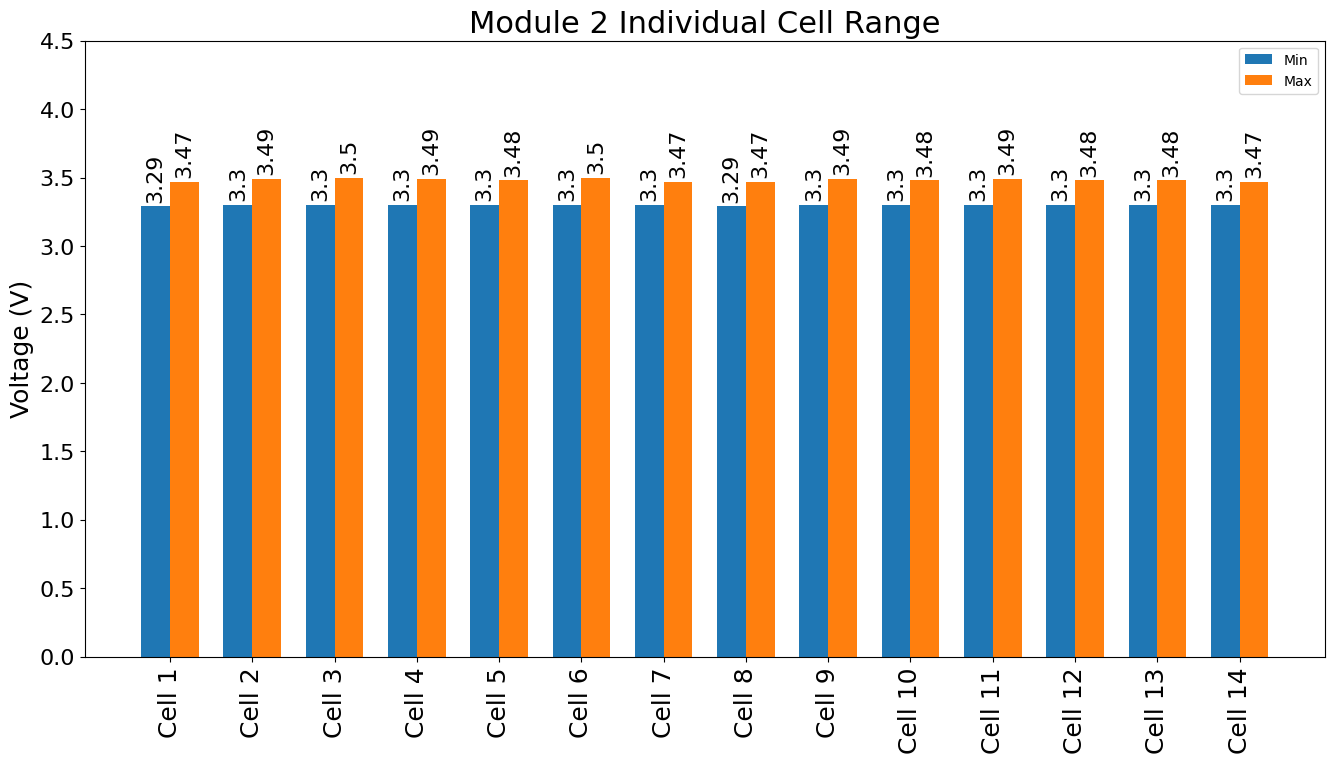

In [70]:
# Plot minimum and maximum cell voltage : Module 2

if total_number_of_modules >= 2:
    # min_values_1 = df_copy[cell_voltage_columns_1].min()
    # max_values_1 = df_copy[cell_voltage_columns_1].max()
    # print(cell_voltage_columns_1)
    # print(min_values)
    # plt.bar(cell_voltage_columns_1, min_values, color='skyblue')
    fig,ax = plt.subplots(figsize= (16,8))

    # Replace 'cells' with your cell labels
    # cells = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4', 'Cell 5', 'Cell 6', 'Cell 7', 'Cell 8', 'Cell 9', 'Cell 10','Cell 11', 'Cell 12', 'Cell 13', 'Cell 14', 'Cell 15', 'Cell 16', 'Cell 17', 'Cell 18' ]
    # cells = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4', 'Cell 5', 'Cell 6', 'Cell 7', 'Cell 8', 'Cell 9', 'Cell 10','Cell 11', 'Cell 12', 'Cell 13', 'Cell 14']
    cells = [0]*cells_of_module2
    for i in range(1,cells_of_module2+1):
        cells[i-1] = 'Cell ' + str(i)
    
    # Replace these lists with your min and max values
    min_voltages_2 = min_values_2
    max_voltages_2 = max_values_2

    x = np.arange(len(cells))  # the label locations
    width = 0.35  # the width of the bars

    ax = plt.gca()

    # Plotting the bars for min and max voltages
    rects1 = ax.bar(x - width/2, min_voltages_2, width, label='Min')
    rects2 = ax.bar(x + width/2, max_voltages_2, width, label='Max')

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Voltage (V)', fontsize = 18)
    ax.set_title('Module 2 Individual Cell Range', fontsize = 22)
    ax.set_xticks(x)
    plt.xticks(rotation='vertical')
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xticklabels(cells, fontsize = 18)
    ax.set_ylim([0.0, max(max_voltages_2)+1])
    ax.legend(loc = 'best')

    # Function to add labels on top of the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', rotation = 90, fontsize = 16)

    autolabel(rects1)
    autolabel(rects2)
    plt.savefig(report_path +'/Battery_module2_cell_v_minmax.jpg',bbox_inches='tight',dpi =600)

    # Display the plot
    plt.show()


In [71]:
# Average current value

# avg_condition = (df_copy['BatteryCurrent'] > 0.5) # For general
# avg_condition2 = (df_copy['BatteryCurrent'] < -0.5) # For general
avg_condition = (df_copy['Battery Current'] > 0.5) # For Device 63
avg_condition2 = (df_copy['Battery Current'] < -0.5) # For Device 63
combined_avg_condition = avg_condition | avg_condition2
# avg_battery_current_valuewithsign = df_copy['BatteryCurrent'].max()
# avg_battery_current = df_copy.loc[combined_avg_condition, ['BatteryCurrent','Time(s)']] # For general
# avg_battery_current_value = avg_battery_current['BatteryCurrent'].mean() # For general
avg_battery_current = df_copy.loc[combined_avg_condition, ['Battery Current','Time(s)']] # For Device 63
avg_battery_current_value = avg_battery_current['Battery Current'].mean() # For Device 63
# avg_battery_current_value
# avg_battery_current_valuewithsign

In [72]:
# Maximum current value

max_positive_current_value = max(df_copy['Battery Current'])
max_negative_current_value = min(df_copy['Battery Current'])

if (abs(max_positive_current_value) >= abs(max_negative_current_value)):
    overall_max_current_value = max_positive_current_value 
else:
    overall_max_current_value = max_negative_current_value

Obtain Maximum and Minimum Module temperature

In [73]:
# Maximum and minimum external temperature module 1 

if total_number_of_modules >= 1:
    if board_version == 1:
        last_exTemp = 13
    if board_version == 2:
        last_exTemp = 12
    cell_temperature_columns = [f'Temp_Master1_{i}' for i in range(1,last_exTemp+1)]
    # change column here
    # cell_temperature_columns = [f'Temp_Module1_{i}' for i in range(1,last_exTemp+1)]

    max_temp_array = [None] * (last_exTemp)
    min_temp_array = [None] * (last_exTemp)
    # print(max_temp_array)
    i = 0
    min_temp_values = df_copy[cell_temperature_columns].min()
    max_temp_values = df_copy[cell_temperature_columns].max()
    # print(max_temp_values)
    for max_val in max_temp_values:
        max_temp_array[i] = max_val
        i = i + 1
    i = 0
    for min_val in min_temp_values:
        min_temp_array[i] = min_val
        i = i + 1
    # print(max_temp_array)
    exTemp_max_value_1 = max(max_temp_array)
    exTemp_max_value_pos_1 = max_temp_array.index(exTemp_max_value_1)+1
    exTemp_min_value_1 = min(min_temp_array)
    exTemp_min_value_pos_1 = min_temp_array.index(exTemp_min_value_1)+1
    # print(exTemp_max_value_1)
    # print(exTemp_max_value_pos_1)
    # print(exTemp_min_value_1)
    # print(exTemp_min_value_pos_1)

In [74]:
# Maximum and minimum external temperature module 2 

if total_number_of_modules >= 2:
    # if board_version == 1:
    #     last_exTemp = 13
    # if board_version == 2:
    last_exTemp_2 = 7
    cell_temperature_columns_2 = [f'Temp_Slave1_{i}' for i in range(1,last_exTemp_2+1)]
    max_temp_array_2 = [None] * (last_exTemp_2)
    min_temp_array_2 = [None] * (last_exTemp_2)
    # print(max_temp_array)
    i = 0
    min_temp_values_2 = df_copy[cell_temperature_columns_2].min()
    max_temp_values_2 = df_copy[cell_temperature_columns_2].max()
    # print(max_temp_values)
    for max_val_2 in max_temp_values_2:
        max_temp_array_2[i] = max_val_2
        i = i + 1
    i = 0
    for min_val_2 in min_temp_values_2:
        min_temp_array_2[i] = min_val_2
        i = i + 1
    # print(max_temp_array)
    exTemp_max_value_2 = max(max_temp_array_2)
    exTemp_max_value_pos_2 = max_temp_array_2.index(exTemp_max_value_2)+1
    exTemp_min_value_2 = min(min_temp_array_2)
    exTemp_min_value_pos_2 = min_temp_array_2.index(exTemp_min_value_2)+1
    # print(exTemp_max_value)
    # print(exTemp_max_value_pos)
    # print(exTemp_min_value)
    # print(exTemp_min_value_pos)

Plot Maximum and Minimum Module temperature

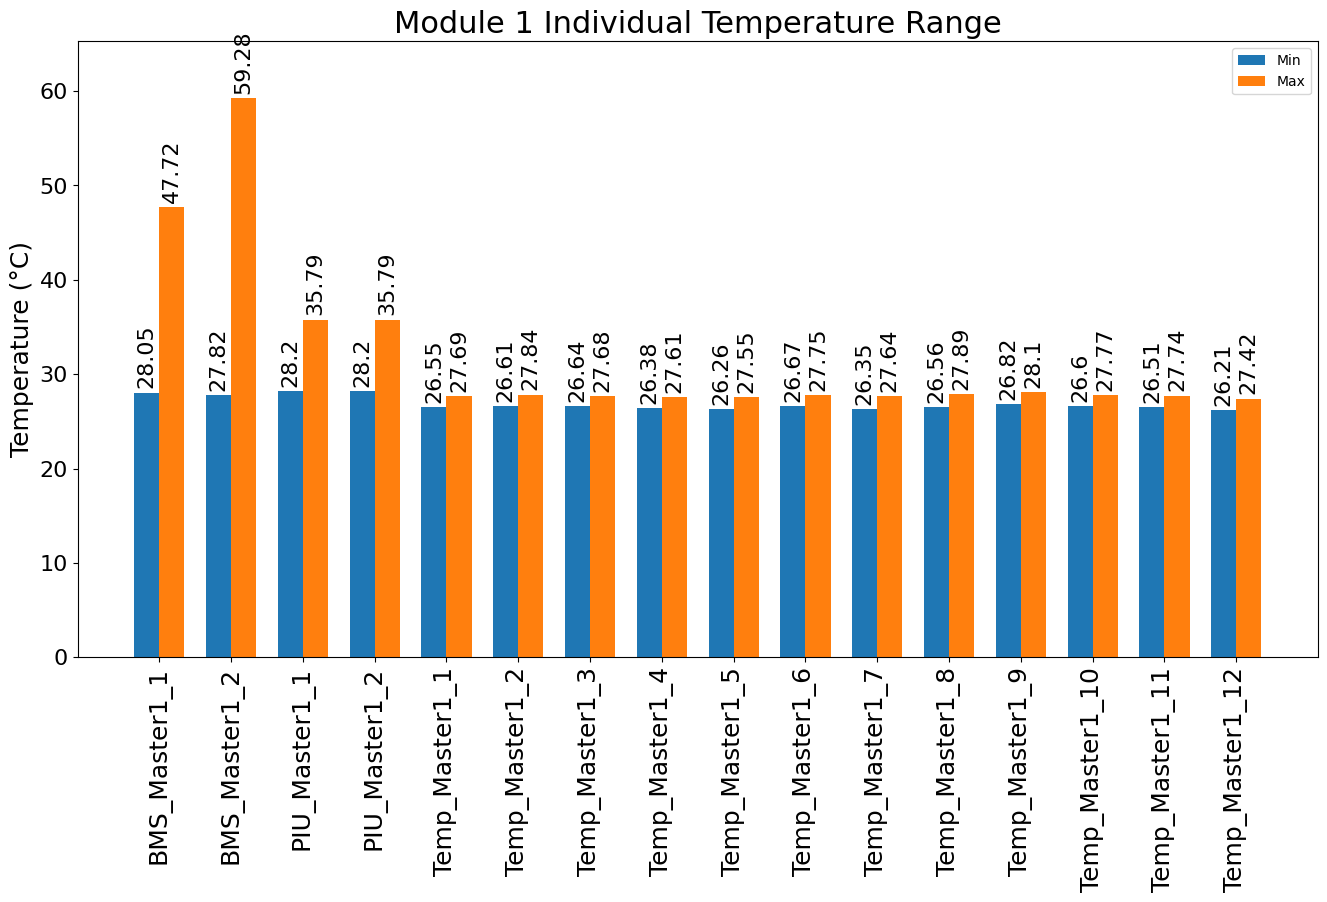

In [75]:
# Plot minimum and maximum external temperature : Module 1

if total_number_of_modules >= 1:
    if board_version == 1:
        # internal_temperature_columns = ['BMS_Master1_1','PIU_Master1_1','PIU_Master1_2'] # For Device 63
        internal_temperature_columns = ['BMS_Module1_1','PIU_Module1_1','PIU_Module1_2'] # For Device 63

    if board_version == 2 and switch_version == 1:    
        internal_temperature_columns = ['BMS_Master1_1','BMS_Master1_2','PIU_Master1_1','PIU_Master1_2']
    if board_version == 2 and switch_version == 2:
        # internal_temperature_columns = ['RCLabs_BMS1', 'RCLabs_BMS2','RCLabs_Cont1','RCLabs_Cont2' ]
        internal_temperature_columns = ['BMS_Master1_1','BMS_Master1_2','PIU_Master1_1','PIU_Master1_2']
    min_values_int_temp = df_copy[internal_temperature_columns].min()
    max_values_int_temp = df_copy[internal_temperature_columns].max()

    # For external temperature value fill up
    # temp_columns = [f'exTemp{i}' for i in range(1,13)] # For general
    if board_version == 1:
        # temp_columns = [f'Temp_Master1_{i}' for i in range(1,last_exTemp+1)] # For Device 63
        # change column here
        temp_columns = [f'Temp_Module1_{i}' for i in range(1,last_exTemp+1)] # For Device 63
    if board_version == 2:
        temp_columns = [f'Temp_Master1_{i}' for i in range(1,last_exTemp+1)] 

    min_values_temp = df_copy[temp_columns].min()
    max_values_temp = df_copy[temp_columns].max()
    # print(min_values_int_temp)
    # print(min_values_temp)

    # min_values_1 = df_copy[cell_voltage_columns_1].min()
    # max_values_1 = df_copy[cell_voltage_columns_1].max()
    # print(cell_voltage_columns_1)
    # print(min_values)
    # plt.bar(cell_voltage_columns_1, min_values, color='skyblue')
    fig,ax = plt.subplots(figsize= (16,8))

    # Replace 'cells' with your cell labels
    temperature_columns = internal_temperature_columns + temp_columns
    # Replace these lists with your min and max values
    min_temp_combined = np.concatenate((min_values_int_temp, min_values_temp))
    max_temp_combined = np.concatenate((max_values_int_temp, max_values_temp))
    # print(min_temp_combined)
    # print(max_temp_combined)

    # print(min_temp_combined)
    # print(max_temp_combined)

    x = np.arange(len(min_temp_combined))  # the label locations
    width = 0.35  # the width of the bars

    ax = plt.gca()

    # Plotting the bars for min and max voltages
    rects1 = ax.bar(x - width/2, min_temp_combined, width, label='Min')
    rects2 = ax.bar(x + width/2, max_temp_combined, width, label='Max')

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Temperature (°C)', fontsize = 18)
    ax.set_title('Module 1 Individual Temperature Range', fontsize = 22)
    ax.set_xticks(x)
    plt.xticks(rotation='vertical')
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xticklabels(temperature_columns, fontsize = 18)
    ax.set_ylim([0.0, max(max_temp_combined)+6])
    ax.legend(loc = 'best')

    # Function to add labels on top of the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', rotation = 90, fontsize = 16)

    autolabel(rects1)
    autolabel(rects2)
    plt.savefig(report_path +'/Battery_module1_cell_temp_minmax.jpg',bbox_inches='tight',dpi =600)

    # Display the plot
    plt.show()


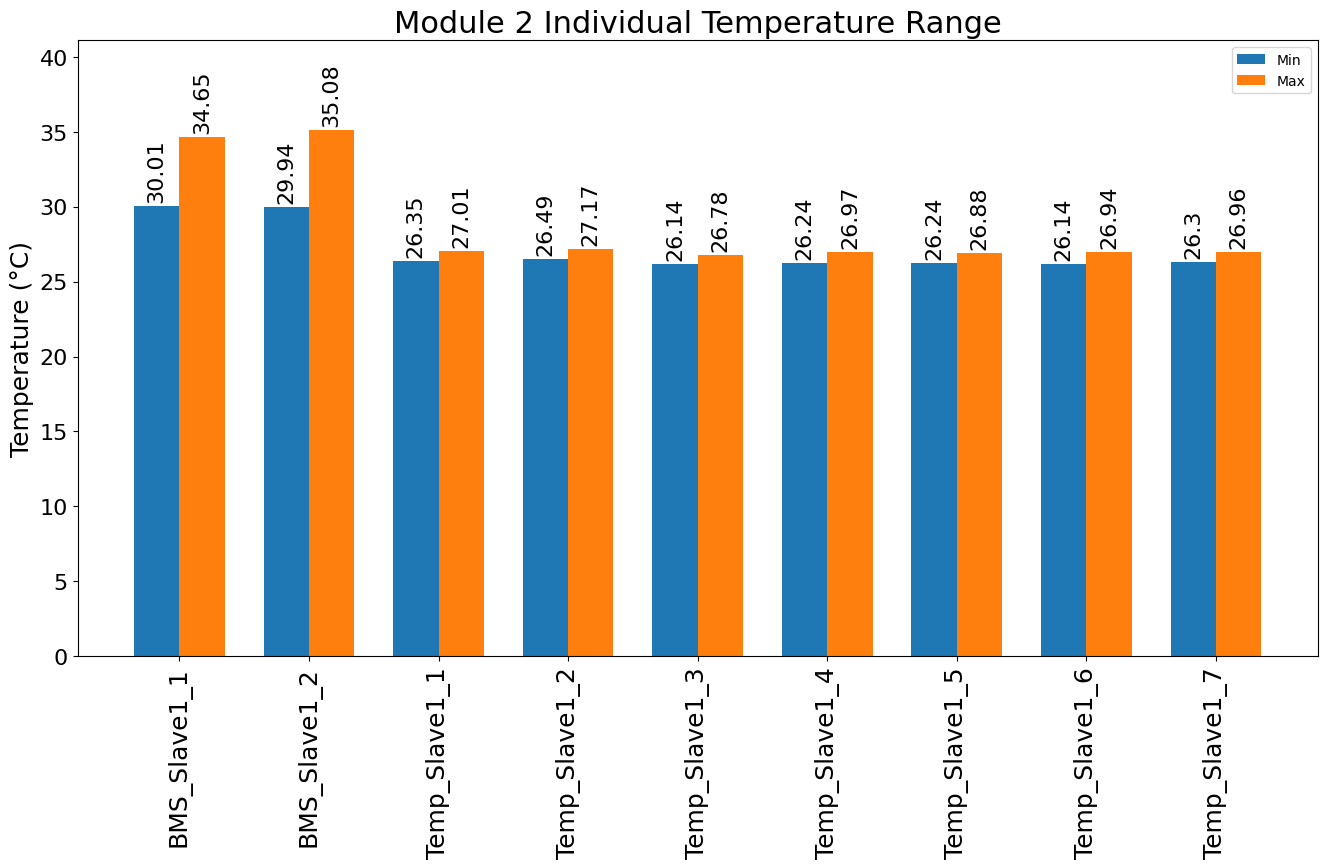

In [76]:
# Plot minimum and maximum external temperature : Module 2

if total_number_of_modules >= 2:
    if board_version == 1:
        # internal_temperature_columns = ['BMS_Master1_1','PIU_Master1_1','PIU_Master1_2'] # For Device 63
        internal_temperature_columns_2 = ['BMS_Module1_1'] # For Device 63

    if board_version == 2 and switch_version == 1:    
        internal_temperature_columns_2 = ['BMS_Slave1_1','BMS_Slave1_2']
    if board_version == 2 and switch_version == 2:
        # internal_temperature_columns = ['RCLabs_BMS1', 'RCLabs_BMS2','RCLabs_Cont1','RCLabs_Cont2' ]
        internal_temperature_columns_2 = ['BMS_Slave1_1','BMS_Slave1_2']
    min_values_int_temp_2 = df_copy[internal_temperature_columns_2].min()
    max_values_int_temp_2 = df_copy[internal_temperature_columns_2].max()

    # For external temperature value fill up
    # temp_columns = [f'exTemp{i}' for i in range(1,13)] # For general
    if board_version == 1:
        # temp_columns = [f'Temp_Master1_{i}' for i in range(1,last_exTemp+1)] # For Device 63
        # change column here
        temp_columns_2 = [f'Temp_Module2_{i}' for i in range(1,last_exTemp_2+1)] # For Device 63
    if board_version == 2:
        temp_columns_2 = [f'Temp_Slave1_{i}' for i in range(1,last_exTemp_2+1)] 

    min_values_temp_2 = df_copy[temp_columns_2].min()
    max_values_temp_2 = df_copy[temp_columns_2].max()
    # print(min_values_int_temp)
    # print(min_values_temp)

    # min_values_1 = df_copy[cell_voltage_columns_1].min()
    # max_values_1 = df_copy[cell_voltage_columns_1].max()
    # print(cell_voltage_columns_1)
    # print(min_values)
    # plt.bar(cell_voltage_columns_1, min_values, color='skyblue')
    fig,ax = plt.subplots(figsize= (16,8))

    # Replace 'cells' with your cell labels
    temperature_columns_2 = internal_temperature_columns_2 + temp_columns_2
    # Replace these lists with your min and max values
    min_temp_combined2 = np.concatenate((min_values_int_temp_2, min_values_temp_2))
    max_temp_combined2 = np.concatenate((max_values_int_temp_2, max_values_temp_2))
    # print(min_temp_combined)
    # print(max_temp_combined)

    # print(min_temp_combined)
    # print(max_temp_combined)

    x = np.arange(len(min_temp_combined2))  # the label locations
    width = 0.35  # the width of the bars

    ax = plt.gca()

    # Plotting the bars for min and max voltages
    rects1 = ax.bar(x - width/2, min_temp_combined2, width, label='Min')
    rects2 = ax.bar(x + width/2, max_temp_combined2, width, label='Max')

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Temperature (°C)', fontsize = 18)
    ax.set_title('Module 2 Individual Temperature Range', fontsize = 22)
    ax.set_xticks(x)
    plt.xticks(rotation='vertical')
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xticklabels(temperature_columns_2, fontsize = 18)
    ax.set_ylim([0.0, max(max_temp_combined2)+6])
    ax.legend(loc = 'best')

    # Function to add labels on top of the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', rotation = 90, fontsize = 16)

    autolabel(rects1)
    autolabel(rects2)
    plt.savefig(report_path +'/Battery_module2_cell_temp_minmax.jpg',bbox_inches='tight',dpi =600)

    # Display the plot
    plt.show()


In [77]:
# Start, stop time

# df_copy['Time'] is a string column
df_copy['Time'] = pd.to_datetime(df_copy['Time'])

start_timestr = df_copy['Time'].iloc[0].strftime('%d-%m-%Y %H:%M:%S')
stop_timestr = df_copy['Time'].iloc[-1].strftime('%d-%m-%Y %H:%M:%S')

start_time = df_copy['Time'].iloc[0]
stop_time = df_copy['Time'].iloc[-1]

# print("Start Time:", start_time)
# print("Stop Time:", stop_time)

time_diff = stop_time - start_time

# time_diff = pd.to_datetime(stop_time) - pd.to_datetime(start_time)
# print("Total time: ", time_diff )

# start_datetime = pd.to_datetime(start_time)
# stop_datetime = pd.to_datetime(stop_time)

# time_diff = stop_datetime - start_datetime
# print("Total time: ", time_diff)

# Print total time in days, hours, minutes, and seconds format:
days = time_diff.days
hours, remainder = divmod(time_diff.seconds, 3600)
minutes, seconds = divmod(remainder, 60)
# print(f"Total time: {days} days, {hours} hours, {minutes} minutes, {seconds} seconds")

In [78]:
# Voltage max min overall values 

voltageMaxGlobalArray = []
voltageMaxGlobalArrayPos = []
voltageMinGlobalArray = []
voltageMinGlobalArrayPos = []

for i in range(1,total_number_of_modules+1):
    voltageMaxGlobalArray.append(globals()[f'voltage_max_value_{i}'])
    voltageMaxGlobalArrayPos.append(globals()[f'voltage_max_value_pos_{i}'])
    voltageMinGlobalArray.append(globals()[f'voltage_min_value_{i}'])
    voltageMinGlobalArrayPos.append(globals()[f'voltage_min_value_pos_{i}'])


# print(voltageMaxGlobalArray)
# print(voltageMaxGlobalArrayPos)
# print(voltageMinGlobalArray)
# print(voltageMinGlobalArrayPos )

print("\n")

voltageMaxGlobal = max(voltageMaxGlobalArray)
voltageMaxGlobalModuleIndex = voltageMaxGlobalArray.index(voltageMaxGlobal)+1
voltageMinGlobal = min(voltageMinGlobalArray)
voltageMinGlobalModuleIndex = voltageMinGlobalArray.index(voltageMinGlobal)+1

# print("Highest cell voltage: " + str(voltageMaxGlobal))
# print("Module " + str(voltageMaxGlobalModuleIndex))
# print("Cell " + str(voltageMaxGlobalArrayPos[voltageMaxGlobalModuleIndex-1]) + "\n")


# print("Lowest cell voltage: " + str(voltageMinGlobal))
# print("Module " + str(voltageMinGlobalModuleIndex))
# print("Cell " + str(voltageMinGlobalArrayPos[voltageMinGlobalModuleIndex-1]) + "\n")


In [79]:
# Temp max min overall values

tempMaxGlobalArray = []
tempMaxGlobalArrayPos = []
tempMinGlobalArray = []
tempMinGlobalArrayPos = []

for i in range(1,total_number_of_modules+1):
    tempMaxGlobalArray.append(globals()[f'exTemp_max_value_{i}'])
    tempMaxGlobalArrayPos.append(globals()[f'exTemp_max_value_pos_{i}'])
    tempMinGlobalArray.append(globals()[f'exTemp_min_value_{i}'])
    tempMinGlobalArrayPos.append(globals()[f'exTemp_min_value_pos_{i}'])


# print(tempMaxGlobalArray)
# print(tempMaxGlobalArrayPos)
# print(tempMinGlobalArray)
# print(tempMinGlobalArrayPos )

# print("\n")

tempMaxGlobal = max(tempMaxGlobalArray)
tempMaxGlobalModuleIndex = tempMaxGlobalArray.index(tempMaxGlobal)+1
tempMinGlobal = min(tempMinGlobalArray)
tempMinGlobalModuleIndex = tempMinGlobalArray.index(tempMinGlobal)+1

print("Highest cell temperature: " + str(tempMaxGlobal))
print("Module " + str(tempMaxGlobalModuleIndex))
print("Temperature Sensor " + str(tempMaxGlobalArrayPos[voltageMaxGlobalModuleIndex-1]) + "\n")


# print("Lowest cell temperature: " + str(tempMinGlobal))
# print("Module " + str(tempMinGlobalModuleIndex))
# print("Temperature Sensor " + str(tempMinGlobalArrayPos[tempMinGlobalModuleIndex-1]))

Highest cell temperature: 28.1
Module 1
Temperature Sensor 9



Loading plotted graph into workbook

In [80]:
# Report (with new changes)

# Load Workbook
if total_number_of_modules == 1:
    wb = load_workbook(r'C:\Users\RC Labs\Lokesh\Report\BMS_final_report_format\BMS_final_report_format\BMSReportformat4_withoutslave1modulev0.1.2Birds.xlsx') 
if total_number_of_modules == 2:
    wb = load_workbook(r'C:\Users\RC Labs\Lokesh\Report\BMS_final_report_format\BMS_final_report_format\BMSReportformat4_withslave2modulesv0.1.2Birds.xlsx') 
elif total_number_of_modules == 3:
    wb = load_workbook(r'C:\Users\RC Labs\Lokesh\Report\BMS_final_report_format\BMS_final_report_format\BMSReportformat4_withslave3modulesv0.1.2Birds.xlsx')
elif total_number_of_modules == 4:
    wb = load_workbook(r'C:\Users\RC Labs\Lokesh\Report\BMS_final_report_format\BMS_final_report_format\BMSReportformat4_withslave4modulesv0.1.2Birds.xlsx') 
elif total_number_of_modules == 5:
    wb = load_workbook(r'C:\Users\RC Labs\Lokesh\Report\BMS_final_report_format\BMS_final_report_format\BMSReportformat4_withslave5modulesv0.1.2TAFE.xlsx') 
    
# Get workbook active sheet from the active attribute. 
sheet = wb.active 
#sheet.title = str(action)+' Cycle'


#processing First page information



# df_copy['DateOnly'] = pd.to_datetime(df_copy['time']).dt.strftime('%Y-%m-%d') # changed time to Time # For general
# df_copy['DateOnly'] = pd.to_datetime(df_copy['Time']).dt.strftime('%d-%m-%Y') # changed time to Time # For Device 63
df_copy['DateTime'] = pd.to_datetime(df_copy['Time'], format='%d-%m-%Y %H:%M:%S.%f')
df_copy['DateOnly'] = df_copy['DateTime'].dt.date
first_date = df_copy['DateOnly'].iloc[0]
# sheet.cell(row = 2, column = 1).value = str(first_date) + ' Cycle' + ' (Battery Serial No: ' + battery_serial_number + ')'
# sheet.cell(row = 2, column = 1).value = str(first_date) + ' Cycle'

#client name
# sheet.cell(row = 2, column = 9).value = str(comp)  
if total_number_of_modules >= 5:
    sheet.cell(row = 2, column = 2).value = str('TAFE')
else:
    sheet.cell(row= 2, column= 2).value = str('Birds India')
# sheet.cell(row = 3, column= 3).value = str('ID001')

#BMS ID
# BMS details
sheet.cell(row = 4, column = 9).value = str("v 3.21(to be changed)")
sheet.cell(row = 6, column = 9).value = str("v 1.0 (to be changed)")
sheet.cell(row = 8, column = 9).value = str("v 1.4(to be changed)")

# SoH
sheet.cell(row = 10, column = 9).value = str(soh) + ' %'

# Cycles
sheet.cell(row = 12, column = 9).value = math.floor(df_copy['Cycles'].iloc[-1])

#Fault information
sheet.cell(row= 2, column=5).value = str('Fault occurrence')
j = 0
for i in range(5,fault_list+1):
    # print(count_fault_occurrence[i])    
    if(count_fault_occurrence[i]):
        # print("writing")
        sheet.cell(row = (3+j),column=5).value = (count_fault_occurrence[i])
        j += 1
# sheet.cell(row= 3, column=5).value = (count_fault_occurrence)

sheet.cell(row= 2, column=6).value = str('Nature of faults')
for i in range(len(faults_table)):
    sheet.cell(row = 3+i,column=6).value = faults_table[i]
if (len(faults_table) == 0):
    sheet.cell(row=3, column= 5).value = 0
    sheet.cell(row = 3, column= 6).value = "NIL"
#rows for fault
border_data = sheet['E2':'F'+str(2+len(faults_table))]
# Create a border style
border_style = Border(
    left=Side(style='thin'),
    right=Side(style='thin'),
    top=Side(style='thin'),
    bottom=Side(style='thin')
)
# for row in border_data:
#     for cell in row:
#         cell.border = border_style
        # if cell.column == 'E':
        #     cell.border = Border(left =border_style.left)
        # if cell.column == 'F':
        #     cell.border = Border(right=border_style.right)

#battery Configuration
sheet.cell(row = 20, column = 5).value = str(battery_configuration)

#Rated Capacity
sheet.cell(row = 21, column = 5).value = str(abs((battery_rated_capacity)))+' Ah'  

#Type of testing
sheet.cell(row = 22, column = 5).value = str(testing_type)  

#observed capacity 
# See values
# sheet.cell(row = 23, column = 5).value = str(abs(rounded_cumulative_capacity)) + ' Ah'

#log time
# See values
# total_seconds = time_diff.total_seconds()
# hours = int(total_seconds // 3600)
# minutes = int((total_seconds % 3600) // 60)
sheet.cell(row = 17, column = 2).value = str((start_timestr)) + ' to ' + str(stop_timestr) 
# sheet.cell(row = 24, column = 5).value = str(hours) + ' hour(s) and ' + str(minutes) + ' minute(s)'
days = time_diff.days
hours, remainder = divmod(time_diff.seconds, 3600)
minutes, seconds = divmod(remainder, 60)
sheet.cell(row = 23, column = 5).value = f'{days} days, {hours} hours, {minutes} minutes, {seconds} seconds'

#battery current 
# max_battery_current_value = df_copy['BatteryCurrent'].max()
# sheet.cell(row = 9, column = 3).value = str(max_battery_current_value) + '('+str(round(abs(max_battery_current_value /battery_rated_capacity),2))+ 'C)'    
if current_output_type == 1:
    battery_current = round(avg_battery_current_value,2)
    sheet.cell(row = 24, column = 1).value = "Battery current (average)"
    sheet.cell(row = 24, column = 5).value = str(round((avg_battery_current_value),2)) + 'A ('+str(round(abs(avg_battery_current_value /battery_rated_capacity),2))+ 'C)'  
if current_output_type == 2:
    battery_current = round(overall_max_current_value,2)
    sheet.cell(row = 24, column = 1).value = "Battery current (maximum)"
    sheet.cell(row = 24, column = 5).value = str(round((overall_max_current_value),2)) + 'A ('+str(round(abs(overall_max_current_value /battery_rated_capacity),2))+ 'C)'  

#internal resistance 
# sheet.cell(row = 26, column = 5).value = internal_resistance


# Overall maximum and minimum cell voltage
sheet.cell(row = 25, column = 5).value = "Module " + str(voltageMaxGlobalModuleIndex) + " Cell " + str(voltageMaxGlobalArrayPos[voltageMaxGlobalModuleIndex-1])
sheet.cell(row = 26, column = 5).value = "Module " + str(voltageMinGlobalModuleIndex) + " Cell " + str(voltageMinGlobalArrayPos[voltageMinGlobalModuleIndex-1])

#battery group voltage min
# min_battery_voltage_value = df_copy['BatteryVoltage'].min() #changed from BatteryVoltage to Battery Volt # For general
min_battery_voltage_value = df_copy['Battery Volt'].min() #changed from BatteryVoltage to Battery Volt # For Device 63

sheet.cell(row = 27, column = 6).value = str(min_battery_voltage_value) + ' V' 

#battery group voltage max
# max_battery_voltage_value = df_copy['BatteryVoltage'].max() #changed from BatteryVoltage to Battery Volt # For general
max_battery_voltage_value = df_copy['Battery Volt'].max() #changed from BatteryVoltage to Battery Volt # For Device 63

sheet.cell(row = 27, column = 8).value = str(max_battery_voltage_value) + ' V'

# img = openpyxl.drawing.image.Image(report_path+'/Battery_SoH.jpg')
# img.anchor = 'A9'
# img.height = 80
# img.width  = 80
# sheet.add_image(img)

# img = openpyxl.drawing.image.Image(report_path+'/Battery_Cycle.jpg')
# img.anchor = 'B9'
# img.height = 80
# img.width  = 80
# sheet.add_image(img)

# sheet.cell(row = 12, column= 1).value = str(present_soh_value + "%")
# sheet.cell(row = 12, column=  2).value = str("120")

# BMS Configuration parameters
sheet.cell(row = 30, column = 8).value = str(low_cell_voltage_limit) + ' V' 
sheet.cell(row = 31, column = 8).value = str(high_cell_voltage_limit) + ' V'
sheet.cell(row = 32, column = 8).value = str(low_battery_voltage_limit) + ' V'
sheet.cell(row = 33, column = 8).value = str(high_battery_voltage_limit) + ' V' 
sheet.cell(row = 34, column = 8).value = str(continous_current_charging_limit) + ' A'
sheet.cell(row = 35, column = 8).value = str(continous_current_discharging_limit) + ' A'
sheet.cell(row = 36, column = 8).value = str(peak_current_charging_discharging_limit) + ' A' 
sheet.cell(row = 37, column = 8).value = str(high_temperature_limit) + ' °C'
sheet.cell(row = 38, column = 8).value = str(low_temperature_limit) + ' °C'



watermarkText = r"RC Labs"

# Function to add watermark to an image
def add_watermark(input_image_path, output_image_path, watermark_text):
    original = Image.open(input_image_path)
    width, height = original.size
    
    # Make the image editable
    txt = Image.new('RGBA', original.size, (255, 255, 255, 0))

    # Choose a font and size
    font = ImageFont.truetype("arial.ttf", 720)

    # Initialize ImageDraw
    d = ImageDraw.Draw(txt)

    # Add text to image
    bbox = d.textbbox((0, 0), watermark_text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    position = ((width - text_width) // 2, (height - text_height) // 3)
    d.text(position, watermark_text, fill=(0, 0, 128, 20), font=font)
    
    # Combine original image with watermark
    watermarked = Image.alpha_composite(original.convert("RGBA"), txt)

    # Convert back to RGB and save as JPEG
    watermarked = watermarked.convert("RGB")
    watermarked.save(output_image_path, format='JPEG')


# Graphs


height = 350
width  = 690

#insert image
# img = openpyxl.drawing.image.Image(report_path +'/BTV_vs_Current.jpg')
watermarked_graph = f"{report_path +'/BTV_vs_Current.jpg'}"
add_watermark(report_path +'/BTV_vs_Current.jpg', watermarked_graph, watermarkText)
img = OpenpyxlImage(watermarked_graph)
img.height = height
img.width  = width
# img.anchor = 'A52'
img.anchor = 'K2'
sheet.add_image(img)
sheet.cell(row = 21, column = 16).value = 'Figure (i)'
bold_and_underline = Font(bold=True, underline='single')
sheet['P21'].font = bold_and_underline
    
img = openpyxl.drawing.image.Image(report_path+'/BMS_state_chart.jpg')
watermarked_graph = f"{report_path +'/BMS_state_chart.jpg'}"
add_watermark(report_path +'/BMS_state_chart.jpg', watermarked_graph, watermarkText)
img = OpenpyxlImage(watermarked_graph)
# img.anchor = 'A72'
img.anchor = 'K22'
img.height = height
img.width  = width
sheet.add_image(img)
sheet.cell(row = 41, column = 16).value = 'Figure (ii)'
sheet['P41'].font = bold_and_underline

img = openpyxl.drawing.image.Image(report_path +'/Battery_SoC.jpg')
watermarked_graph = f"{report_path +'/Battery_SoC.jpg'}"
add_watermark(report_path +'/Battery_SoC.jpg', watermarked_graph, watermarkText)
img = OpenpyxlImage(watermarked_graph)
# img.anchor = 'K52'
img.anchor = 'A52'
img.height = height
img.width  = width
sheet.add_image(img)
sheet.cell(row = 71, column = 6).value = 'Figure (iii)'
sheet['F71'].font = bold_and_underline

# img = openpyxl.drawing.image.Image(report_path +'/Internal_temperature_profile.jpg')
watermarked_graph = f"{report_path +'/Internal_temperature_profile.jpg'}"
add_watermark(report_path +'/Internal_temperature_profile.jpg', watermarked_graph, watermarkText)
img = OpenpyxlImage(watermarked_graph)
# img.anchor = 'A102'
img.anchor = 'A72'
img.height = height
img.width  = width
sheet.add_image(img)
sheet.cell(row = 91, column = 6).value = 'Figure (iv)'
sheet['F91'].font = bold_and_underline

# ----------Module 1-----------------#
if total_number_of_modules >= 1:
    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module1_cell_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module1_cell_v_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module1_cell_v_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    # img.anchor = 'K5'
    img.anchor = 'K52'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 71, column = 16).value = 'Figure (v)'
    sheet['P71'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module1_temp_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module1_cell_temp_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module1_cell_temp_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    # img.anchor = 'K24'
    img.anchor = 'K72'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 91, column = 16).value = 'Figure (vi)'
    sheet['P91'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/Module1_voltage_profile.jpg')
    watermarked_graph = f"{report_path +'/Module1_voltage_profile.jpg'}"
    add_watermark(report_path +'/Module1_voltage_profile.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    # img.anchor = 'K72'
    img.anchor = 'A102'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 121, column = 6).value = 'Figure (vii)'
    sheet['F121'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/External_Temperature_Profile_1.jpg')
    watermarked_graph = f"{report_path +'/External_Temperature_Profile_1.jpg'}"
    add_watermark(report_path +'/External_Temperature_Profile_1.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'A122'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 140, column = 6).value = 'Figure (viii)'
    sheet['F140'].font = bold_and_underline

# ----------Module 2-----------------#
if total_number_of_modules >= 2:
    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module2_cell_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module2_cell_v_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module2_cell_v_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'K102'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 121, column = 16).value = 'Figure (ix)'
    sheet['P121'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module2_temp_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module2_cell_temp_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module2_cell_temp_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'K122'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 140, column = 16).value = 'Figure (x)'
    sheet['P140'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/Module2_voltage_profile.jpg')
    watermarked_graph = f"{report_path +'/Module2_voltage_profile.jpg'}"
    add_watermark(report_path +'/Module2_voltage_profile.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'A151'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 170, column = 6).value = 'Figure (xi)'
    sheet['F170'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'\External_Temperature_Profile_2.jpg')
    watermarked_graph = f"{report_path +'/External_Temperature_Profile_2.jpg'}"
    add_watermark(report_path +'/External_Temperature_Profile_2.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'A171'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 190, column = 6).value = 'Figure (xii)'
    sheet['F190'].font = bold_and_underline

# ----------Module 3-----------------#
if total_number_of_modules >= 3:
    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module3_cell_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module3_cell_v_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module3_cell_v_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)   
    img.anchor = 'K151'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 170, column = 16).value = 'Figure (xiii)'
    sheet['P170'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module3_temp_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module3_cell_temp_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module3_cell_temp_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)   
    img.anchor = 'K171'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 190, column = 16).value = 'Figure (xiv)'
    sheet['P190'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/Module3_voltage_profile.jpg')
    watermarked_graph = f"{report_path +'/Module3_voltage_profile.jpg'}"
    add_watermark(report_path +'/Module3_voltage_profile.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)   
    img.anchor = 'A201'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 220, column = 6).value = 'Figure (xv)'
    sheet['F220'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'\External_Temperature_Profile_3.jpg')
    watermarked_graph = f"{report_path +'/External_Temperature_Profile_3.jpg'}"
    add_watermark(report_path +'/External_Temperature_Profile_3.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)   
    img.anchor = 'A221'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 240, column = 6).value = 'Figure (xvi)'
    sheet['F240'].font = bold_and_underline

# ----------Module 4-----------------#
if total_number_of_modules >= 4:
    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module4_cell_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module4_cell_v_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module4_cell_v_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'K201'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 220, column = 16).value = 'Figure (xvii)'
    sheet['P220'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module4_temp_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module4_cell_temp_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module4_cell_temp_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'K221'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 240, column = 16).value = 'Figure (xviii)'
    sheet['P240'].font = bold_and_underline

    img = openpyxl.drawing.image.Image(report_path +'/Module4_voltage_profile.jpg')
    watermarked_graph = f"{report_path +'/Module4_voltage_profile.jpg'}"
    add_watermark(report_path +'/Module4_voltage_profile.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'A251'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 270, column = 6).value = 'Figure (xix)'
    sheet['F270'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'\External_Temperature_Profile_4.jpg')
    watermarked_graph = f"{report_path +'/External_Temperature_Profile_4.jpg'}"
    add_watermark(report_path +'/External_Temperature_Profile_4.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'A271'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 289, column = 6).value = 'Figure (xx)'
    sheet['F289'].font = bold_and_underline
    
# ----------Module 5-----------------#
if total_number_of_modules >= 5:
    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module5_cell_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module5_cell_v_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module5_cell_v_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'K251'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 270, column = 16).value = 'Figure (xxi)'
    sheet['P270'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/Battery_module5_temp_v_minmax.jpg')
    watermarked_graph = f"{report_path +'/Battery_module5_cell_temp_minmax.jpg'}"
    add_watermark(report_path +'/Battery_module5_cell_temp_minmax.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'K271'
    img.height = height
    img.width  = width
    sheet.add_image(img)  
    sheet.cell(row = 289, column = 16).value = 'Figure (xxii)'
    sheet['P289'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'/Module5_voltage_profile.jpg')
    watermarked_graph = f"{report_path +'/Module5_voltage_profile.jpg'}"
    add_watermark(report_path +'/Module5_voltage_profile.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'A301'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 320, column = 6).value = 'Figure (xxiii)'
    sheet['F320'].font = bold_and_underline

    # img = openpyxl.drawing.image.Image(report_path +'\External_Temperature_Profile_5.jpg')
    watermarked_graph = f"{report_path +'/External_Temperature_Profile_5.jpg'}"
    add_watermark(report_path +'/External_Temperature_Profile_5.jpg', watermarked_graph, watermarkText)
    img = OpenpyxlImage(watermarked_graph)
    img.anchor = 'A321'
    img.height = height
    img.width  = width
    sheet.add_image(img)
    sheet.cell(row = 339, column = 6).value = 'Figure (xxiv)'
    sheet['F339'].font = bold_and_underline

# ---------------------------#


#Note 


sheet.cell(row = 43, column= 11).value = 'Note: \n 1.The above plots showcases the overall battery voltage and current profile and the BMS event chart. \n 2. Here, positive current showcases charging and negative current showcases discharging.\n 3. With the BMS Event Chart having no faults, it showcases the test was conducted successfully.'
sheet.cell(row = 93, column = 1).value= 'Note: \n 1. The above graphs summarize the battery SoC and internal temperature profile.'

if total_number_of_modules >= 1:
    sheet.cell(row = 93, column = 11).value= 'Note: \n 1. The above graphs summarize the module voltages and the temperature sensors present on Module 1. \n 2. The data here showcases upto three decimal points, showcasing high ADC resolution.'
    if total_number_of_modules < 2:
        sheet.cell(row = 142, column = 1).value= 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 1. \n \n Definition and Abbreviations:\n Master: Module 1; \n BMS: Battery Management System; min: Minimum; max: Maximum; SoC: State Of Charge; C: Celsius'
    else:
        sheet.cell(row = 142, column = 1).value= 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 1.'
        
if total_number_of_modules >= 2:
    sheet.cell(row = 142, column = 11).value= 'Note: \n 1. The above graphs summarize the module voltages and the temperature sensors present on Module 2. \n 2. The data here showcases upto three decimal points, showcasing high ADC resolution.' 
    if total_number_of_modules < 3:
        sheet.cell(row = 192, column = 1).value= 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 2. \n \n Definition and Abbreviations:\n Master: Module 1; Slave1: Module 2 \n BMS: Battery Management System; min: Minimum; max: Maximum; SoC: State Of Charge; C: Celsius'
    else:
        sheet.cell(row = 192, column = 1).value= 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 2.'
        
if total_number_of_modules >= 3:
    sheet.cell(row = 192, column = 11).value= 'Note: \n 1. The above graphs summarize the module voltages and the temperature sensors present on Module 3. \n 2. The data here showcases upto three decimal points, showcasing high ADC resolution.' 
    if total_number_of_modules < 4:
        sheet.cell(row = 242, column = 1).value= 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 3. \n \n Definition and Abbreviations:\n Master: Module 1; Slave1: Module 2; Slave2: Module 3 \n BMS: Battery Management System; min: Minimum; max: Maximum; SoC: State Of Charge; C: Celsius'
    else:
        sheet.cell(row = 242, column = 1).value= 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 3.'
    
if total_number_of_modules >= 4:
    sheet.cell(row = 242, column = 11).value= 'Note: \n 1. The above graphs summarize the module voltages and the temperature sensors present on Module 4. \n 2. The data here showcases upto three decimal points, showcasing high ADC resolution.' 
    if total_number_of_modules < 5:
        sheet.cell(row = 291, column = 1).value= 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 4 \n \n Definition and Abbreviations:\n Master: Module 1; Slave1: Module 2; Slave2: Module 3; Slave3: Module 4 \n BMS: Battery Management System; min: Minimum; max: Maximum; SoC: State Of Charge; C: Celsius'
    else:
        sheet.cell(row = 291, column = 1).value= 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 4.'
    
if total_number_of_modules >= 5:
    sheet.cell(row = 291, column = 11).value= 'Note: \n 1. The above graphs summarize the module voltages and the temperature sensors present on Module 5. \n 2. The data here showcases upto three decimal points, showcasing high ADC resolution.' 
    # if total_number_of_modules < 6:
    #     sheet.cell (row = 341, column= 1).value = 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 5.'
    # else:
    sheet.cell (row = 341, column= 1).value = 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 5. \n \n Definition and Abbreviations:\n Master: Module 1; Slave1: Module 2; Slave3: Module 4; Slave4: Module 5 \n BMS: Battery Management System; min: Minimum; max: Maximum; SoC: State Of Charge; C: Celsius'

if(user_input == 1):
    sheet.cell(row = 43, column = 1).value = ' Note: \n 1. The battery pack was charged at maximum of ' + str(abs(int(overall_max_current_value))) + ' A. \n 2. The maximum battery pack temperature observed was ' + str(tempMaxGlobal) + ' degree C of Module ' + str(tempMaxGlobalModuleIndex) + ', temperature sensor ' + str(tempMaxGlobalArrayPos[tempMaxGlobalModuleIndex-1]) + '.\n 3. The battery pack was tested for ' +  f'{days} days, {hours} hours, {minutes} minutes'  + ' with the BMS activating cut off due to high cell voltage of module ' + str(voltageMaxGlobalModuleIndex) + ' , since the load was still connected, the BMS shows overcurrent fault until one removes the load.'
if(user_input == 2):
    sheet.cell(row = 43, column = 1).value = 'Note: \n 1. The battery pack was discharged at maximum of ' + str(abs(int(overall_max_current_value))) + 'A. \n 2. The maximum battery pack temperature observed was ' + str(tempMaxGlobal) + ' degree C of Module ' + str(tempMaxGlobalModuleIndex) + ', temperature sensor ' + str(tempMaxGlobalArrayPos[tempMaxGlobalModuleIndex-1]) + '.\n 3. The battery pack was tested for ' + f'{days} days, {hours} hours, {minutes} minutes' + ' with the BMS activating cut off due to low cell voltage of module ' + str(voltageMinGlobalModuleIndex) + ' , since the load was still connected, the BMS shows overcurrent fault until one removes the load.'
    # sheet.cell(row = 34, column = 1).value = 'Note: \n 1. Battery pack was discharged at ' + str(round((battery_current),2)) + ' A, the capacity was calculated as ' + str(round(abs(cumulative_capacity),2)) + ' Ah. \n 2. The maximum battery pack temperature was ' + str('NA') + ' degree C. \n 3. The battery pack discharge was completed in ' + str(hours) + ' hour(s) and ' + str(minutes) + ' minute(s)' + ' with the BMS activating cut off due to low cell voltage of module ' + str(round(abs(min_cellv_position+1),2)) + ' , since the load was still connected, the BMS shows overcurrent fault until one removes the load.'

#change here for 
# sheet.cell (row = 341, column= 1).value = 'Note: \n 1. The above plots summarize the module voltages and temperature profiles of Module 5. \n \n Definition and Abbreviations:\n Master: Module 1; Slave1: Module 2 \n BMS: Battery Management System; min: Minimum; max: Maximum; SoC: State Of Charge; C: Celsius,'
# sheet.cell (row = 53, column= 1).value = 'Abbreviations:'
# sheet.cell (row = 54, column= 1).value = 'Master1: Master' 
# sheet.cell (row = 55, column= 1).value = 'Slave1: Board2'

# save the file 
if (user_input == 1):
    wb.save(report_path + '\\' + comp + '_' + date + '_' + action + '_ChargeReport .xlsx')
if (user_input == 2):
    wb.save(report_path + '\\' + comp + '_' + date + '_' + action + '_DischargeReport .xlsx')
# report_final_path =  report_path +'\Report_Device63_24082023_DCH1web.xlsx'

# wb.save(report_final_path)
print('Done')

c:\Users\RC Labs\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (139302088 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Done
